In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# To build SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

#Load data

In [2]:
df = pd.read_csv('/content/Rose.csv')

In [3]:
df.head(5)

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [4]:
df.tail(5)

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [5]:
df.shape

(187, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [7]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [8]:
df.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

## Missing values

In [9]:
df['Rose'] = df['Rose'].fillna(df['Rose'].mean())

In [10]:
df.isnull().sum()

YearMonth    0
Rose         0
dtype: int64

## Convert to datetime column

In [11]:
df['YearMonth'] = pd.to_datetime(df['YearMonth'])
df.set_index('YearMonth',inplace=True)

In [12]:
df

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]

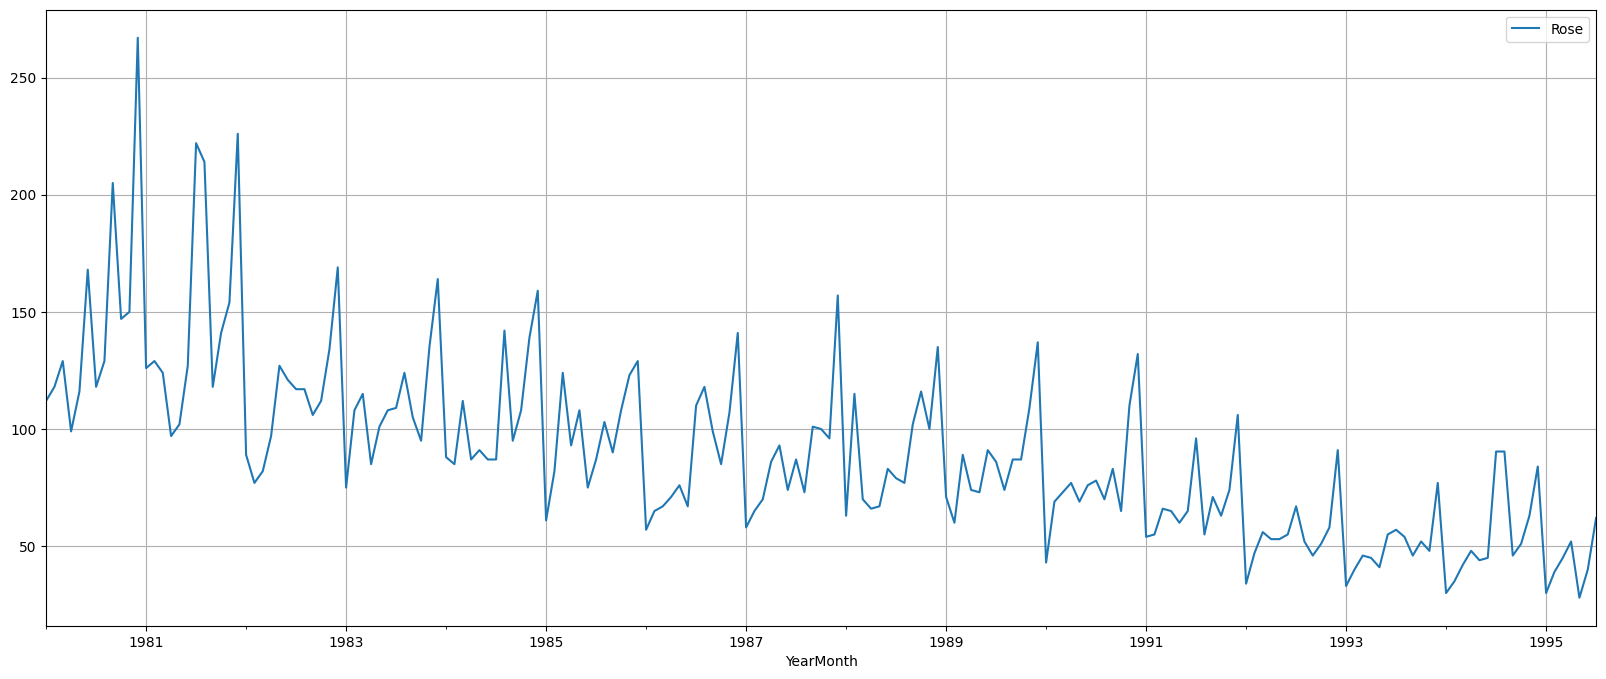

In [13]:
# plot
df.plot(figsize=(20,8))
plt.grid();

In [14]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

Rose  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5

In [15]:
df.shape

(187, 3)

## Perform EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
 1   Year    187 non-null    int32  
 2   Month   187 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 4.4 KB


In [17]:
df[df.Month==7]

Rose  Year  Month
YearMonth                          
1980-07-01  118.000000  1980      7
1981-07-01  222.000000  1981      7
1982-07-01  117.000000  1982      7
1983-07-01  109.000000  1983      7
1984-07-01   87.000000  1984      7
1985-07-01   87.000000  1985      7
1986-07-01  110.000000  1986      7
1987-07-01   87.000000  1987      7
1988-07-01   79.000000  1988      7
1989-07-01   86.000000  1989      7
1990-07-01   78.000000  1990      7
1991-07-01   96.000000  1991      7
1992-07-01   67.000000  1992      7
1993-07-01   57.000000  1993      7
1994-07-01   90.394595  1994      7
1995-07-01   62.000000  1995      7

In [18]:
#Resample the data to get values at a month-level from the day-level data by taking the average over the months.

df = df.resample('M').mean()
df.head()

Rose    Year  Month
YearMonth                       
1980-01-31  112.0  1980.0    1.0
1980-02-29  118.0  1980.0    2.0
1980-03-31  129.0  1980.0    3.0
1980-04-30   99.0  1980.0    4.0
1980-05-31  116.0  1980.0    5.0

In [19]:
df.shape #Find the shape of the data after resampling

(187, 3)

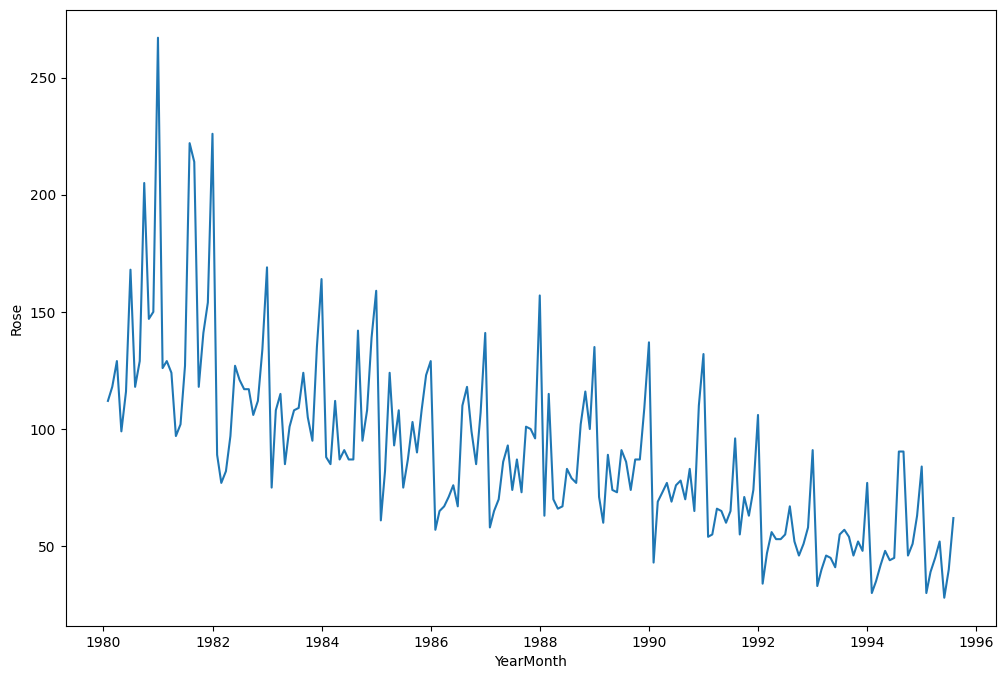

In [20]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index, y='Rose') #to find the trend of Rose at year-month level
plt.show()

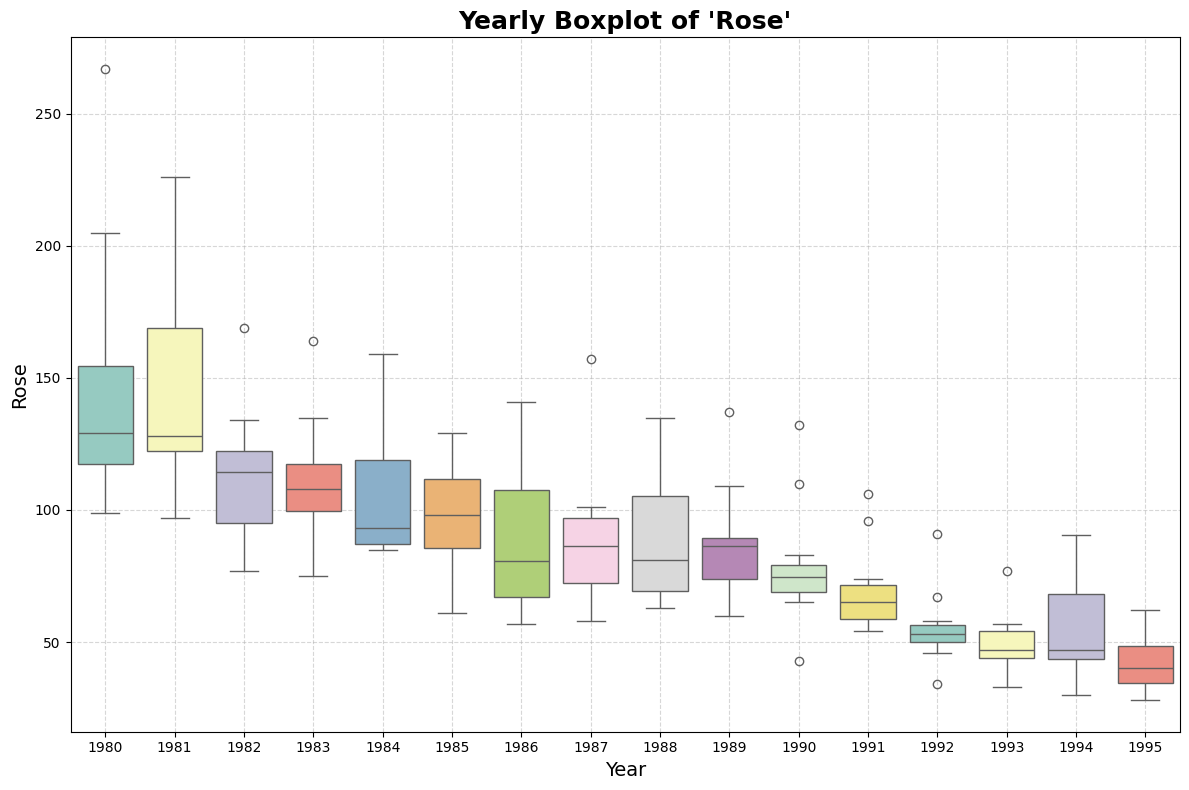

In [21]:
# to plot a boxplot at year level

# Set the figure size
plt.figure(figsize=(12, 8))

# Get unique years from the index
years = df.index.year
unique_years = sorted(years.unique())

# Generate a color palette with one shade per year
palette = sns.color_palette("Set3", len(unique_years))  # Try "husl", "tab20", "Set2", etc.

# Create the boxplot with different shades
sns.boxplot(x=years, y='Rose', data=df, palette=palette)

# Improve readability
plt.title("Yearly Boxplot of 'Rose'", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Rose", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
#plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

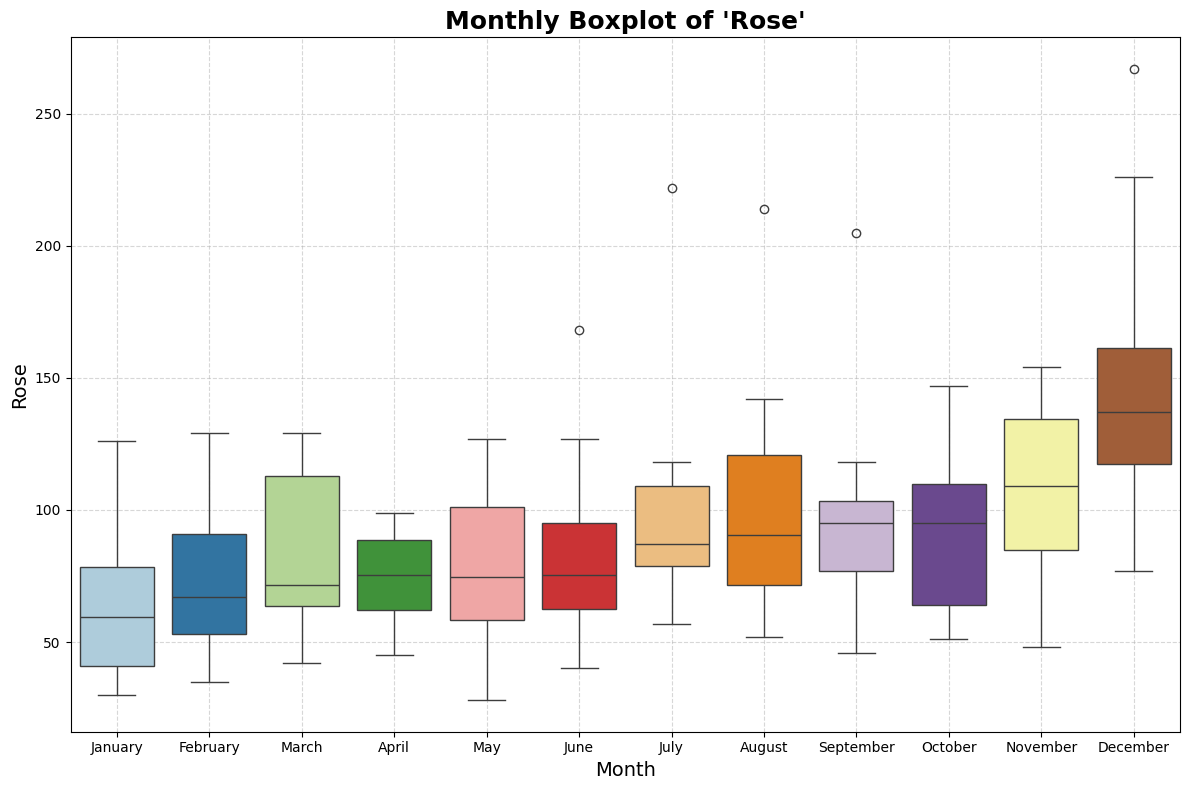

In [22]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Extract month names from the index
months = df.index.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Generate a color palette with 12 distinct colors
palette = sns.color_palette("Paired", 12)

# Create the boxplot
sns.boxplot(x=months, y='Rose', data=df, order=month_order, palette=palette)

# Improve readability
plt.title("Monthly Boxplot of 'Rose'", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Rose", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
#plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

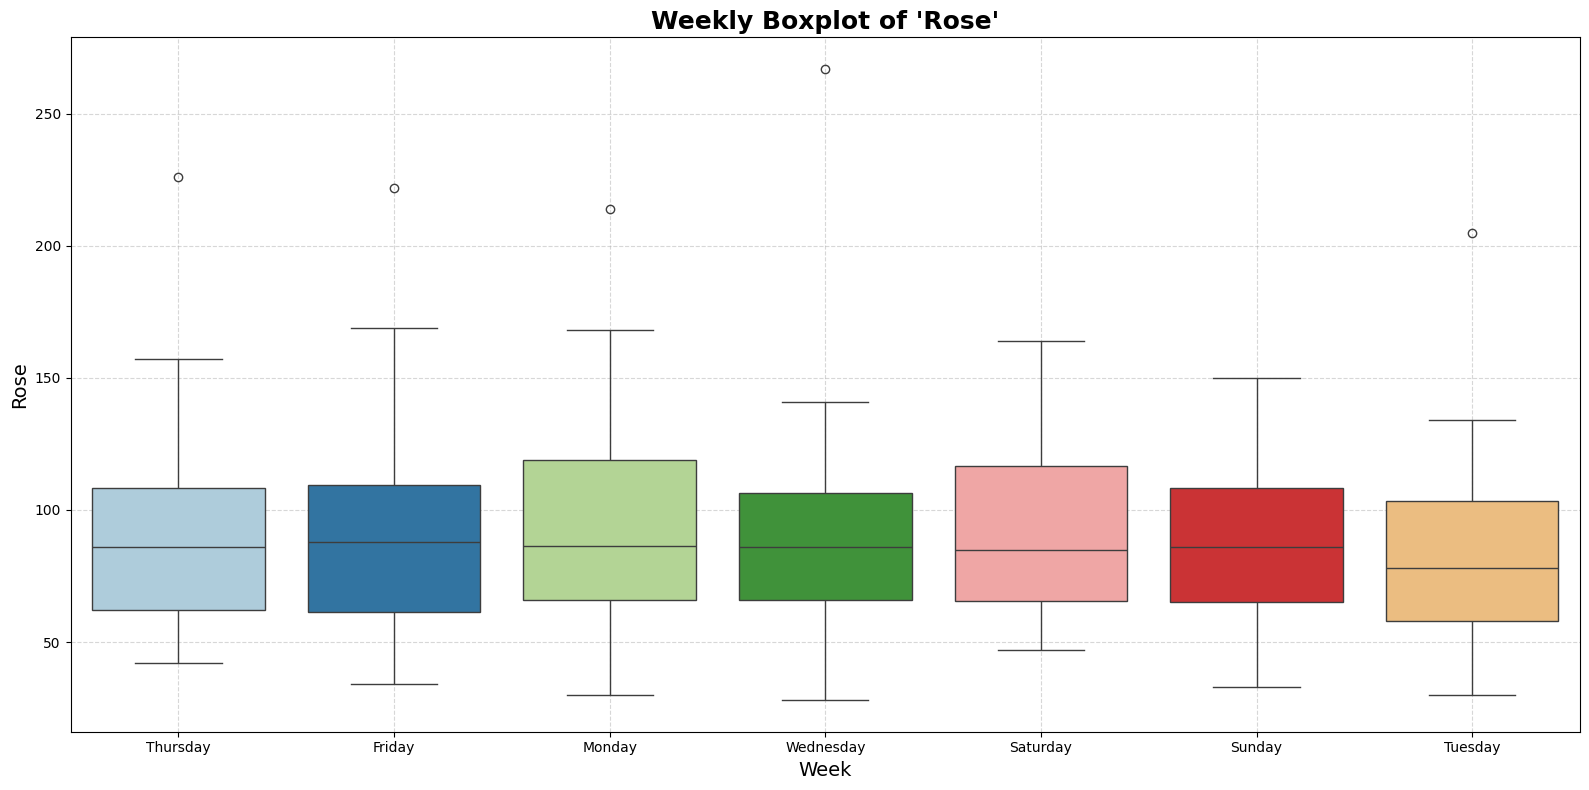

In [23]:
# Set the figure size
plt.figure(figsize=(16, 8))  # Wider for 52 week numbers

palette = sns.color_palette("Paired", 7)
# Create the boxplot
sns.boxplot(x = df.index.day_name(),y = 'Rose',data=df, palette=palette)

# Improve plot styling
plt.title("Weekly Boxplot of 'Rose'", fontsize=18, fontweight='bold')
plt.xlabel("Week", fontsize=14)
plt.ylabel("Rose", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
#plt.xticks(rotation=90, fontsize=9)

plt.tight_layout()
plt.show()

In [24]:
#a pivot table to display monthly price across years
monthly_price_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_price_across_years

YearMonth  April      August  December  February  January        July   June  \
YearMonth                                                                      
1980        99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981        97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982        97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983        85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984        87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985        93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986        71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987        86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988        66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989        74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990        77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991        65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992        53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993        45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994        48.0   90.394595      84.0      35.0     30.0   90.394595   45.0   
1995        52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

YearMonth  March    May  November  October  September  
YearMonth                                              
1980       129.0  116.0     150.0    147.0      205.0  
1981       124.0  102.0     154.0    141.0      118.0  
1982        82.0  127.0     134.0    112.0      106.0  
1983       115.0  101.0     135.0     95.0      105.0  
1984       112.0   91.0     139.0    108.0       95.0  
1985       124.0  108.0     123.0    108.0       90.0  
1986        67.0   76.0     107.0     85.0       99.0  
1987        70.0   93.0      96.0    100.0      101.0  
1988        70.0   67.0     100.0    116.0      102.0  
1989        89.0   73.0     109.0     87.0       87.0  
1990        73.0   69.0     110.0     65.0       83.0  
1991        66.0   60.0      74.0     63.0       71.0  
1992        56.0   53.0      58.0     51.0       46.0  
1993        46.0   41.0      48.0     52.0       46.0  
1994        42.0   44.0      63.0     51.0       46.0  
1995        45.0   28.0       NaN      NaN        NaN

<Figure size 1500x800 with 0 Axes>

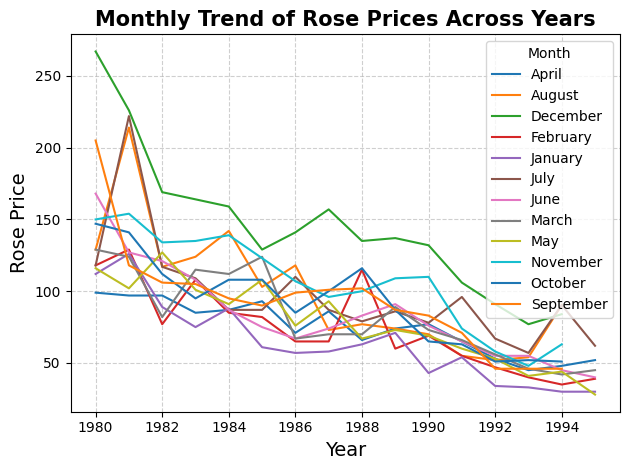

In [25]:
#To plot trend of months across years
# Set the figure size
plt.figure(figsize=(15, 8))

# Plot each year's monthly trend
monthly_price_across_years.plot()

# Beautify the plot
plt.title('Monthly Trend of Rose Prices Across Years', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rose Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Month', loc='best', fontsize=10)
#plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Correlation Plot

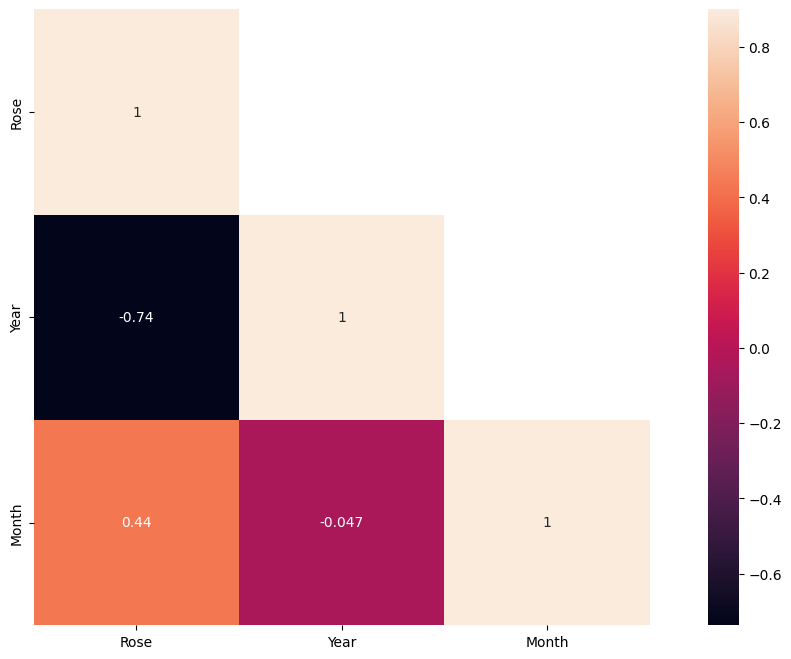

In [26]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

## ECDF: Empirical Cumulative Distribution Function

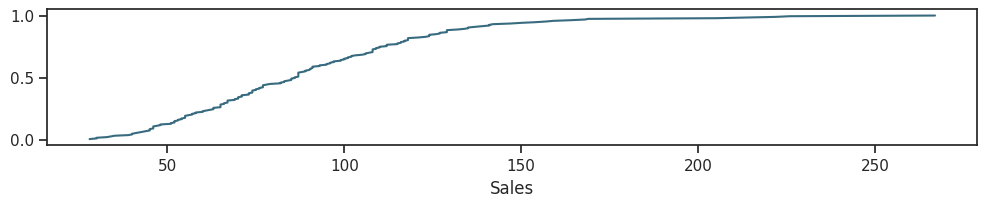

In [27]:
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
sns.set(style = "ticks")# to format into seaborn
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))


plt.subplot(312)
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

## Decomposition

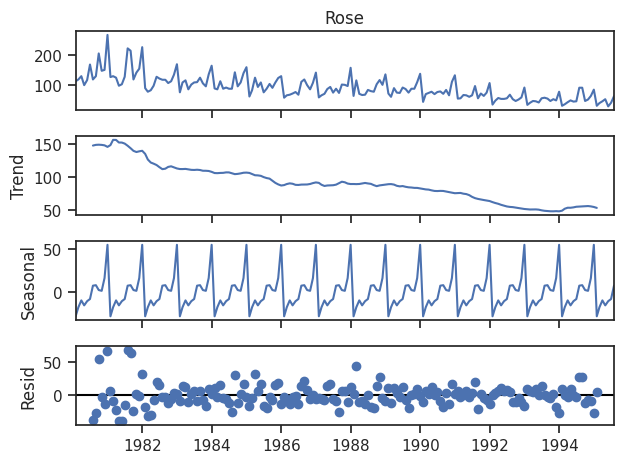

In [28]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: ME, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -28.403723
1980-02-29   -17.833219
1980-03-31    -9.816537
1980-04-30   -15.629037
1980-05-31   -10.727251
1980-06-30    -8.209394
1980-07-31     7.405916
1980-08-31     7.986472
1980-09-30     2.279610
1980-10-31     1.376832
1980-11-30    16.351832
1980-12-31    55.218499
Freq: ME, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.489250
1980-08-31   -27.111472
1980-09-30    54.345390
1980-10-31    -2.460165
1980-11-30   -13.768499
19

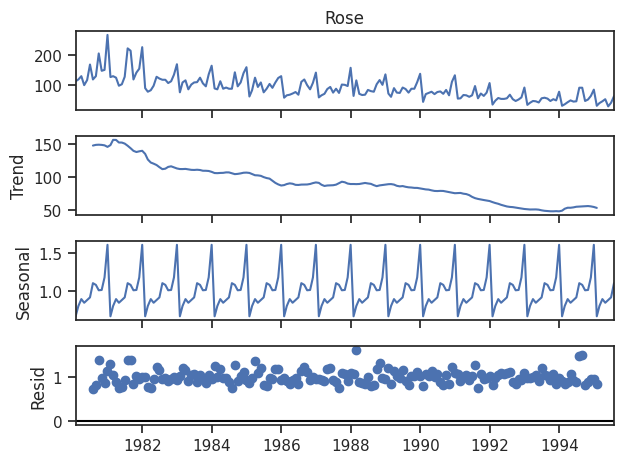

In [30]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: ME, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.664388
1980-02-29    0.800694
1980-03-31    0.892495
1980-04-30    0.844044
1980-05-31    0.880516
1980-06-30    0.915220
1980-07-31    1.103899
1980-08-31    1.081169
1980-09-30    1.009574
1980-10-31    1.013692
1980-11-30    1.181135
1980-12-31    1.613174
Freq: ME, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.726757
1980-08-31    0.805504
1980-09-30    1.368532
1980-10-31    0.979276
1980-11-30    0.861480
1980-12-31    1.140480
Fr

## Data Preprocessing

### Split the data into train and test and plot the training and test data. The test data should start in 1991.

In [32]:
# Split the data into training and testing sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [33]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose    Year  Month
YearMonth                       
1980-01-31  112.0  1980.0    1.0
1980-02-29  118.0  1980.0    2.0
1980-03-31  129.0  1980.0    3.0
1980-04-30   99.0  1980.0    4.0
1980-05-31  116.0  1980.0    5.0

Last few rows of Training Data


Rose    Year  Month
YearMonth                       
1990-08-31   70.0  1990.0    8.0
1990-09-30   83.0  1990.0    9.0
1990-10-31   65.0  1990.0   10.0
1990-11-30  110.0  1990.0   11.0
1990-12-31  132.0  1990.0   12.0

First few rows of Test Data


Rose    Year  Month
YearMonth                      
1991-01-31  54.0  1991.0    1.0
1991-02-28  55.0  1991.0    2.0
1991-03-31  66.0  1991.0    3.0
1991-04-30  65.0  1991.0    4.0
1991-05-31  60.0  1991.0    5.0

Last few rows of Test Data


Rose    Year  Month
YearMonth                      
1995-03-31  45.0  1995.0    3.0
1995-04-30  52.0  1995.0    4.0
1995-05-31  28.0  1995.0    5.0
1995-06-30  40.0  1995.0    6.0
1995-07-31  62.0  1995.0    7.0

In [34]:
#To check the shape of train and test sets
print("Train: ",train.shape)
print("Test: ",test.shape)

Train:  (132, 3)
Test:  (55, 3)


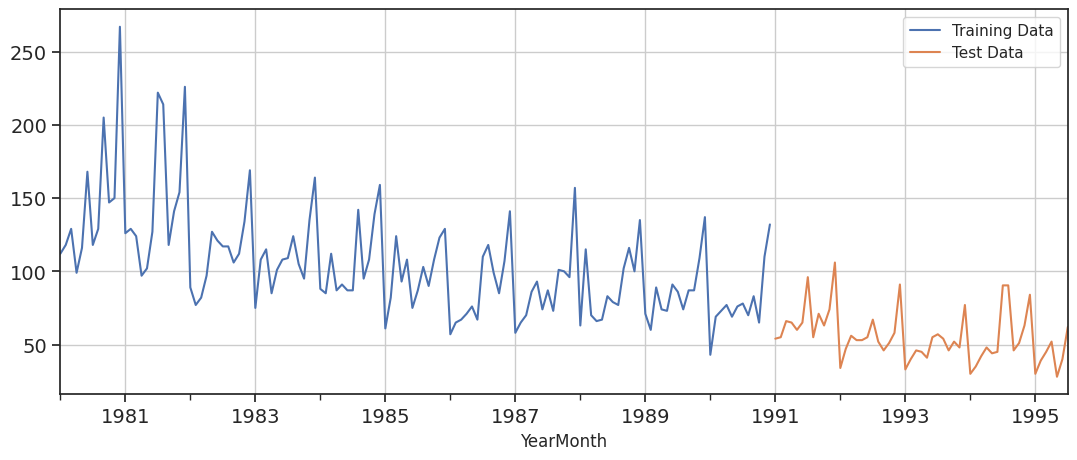

In [35]:
train['Rose'].plot(figsize=(13,5), fontsize=14) #Code to find the trend of train data
plt.grid()
test['Rose'].plot(figsize=(13,5), fontsize=14)  #Code to find the trend of test data
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Model Building - Original Data

## Linear Regression

In [36]:
#Complete the code to generate the numerical time instance order for both the training and test set.
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train) for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [37]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [38]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose    Year  Month  time
YearMonth                             
1980-01-31  112.0  1980.0    1.0     1
1980-02-29  118.0  1980.0    2.0     2
1980-03-31  129.0  1980.0    3.0     3
1980-04-30   99.0  1980.0    4.0     4
1980-05-31  116.0  1980.0    5.0     5 

Last few rows of Training Data 
              Rose    Year  Month  time
YearMonth                             
1990-08-31   70.0  1990.0    8.0   128
1990-09-30   83.0  1990.0    9.0   129
1990-10-31   65.0  1990.0   10.0   130
1990-11-30  110.0  1990.0   11.0   131
1990-12-31  132.0  1990.0   12.0   132 

First few rows of Test Data 
             Rose    Year  Month  time
YearMonth                            
1991-01-31  54.0  1991.0    1.0   132
1991-02-28  55.0  1991.0    2.0   133
1991-03-31  66.0  1991.0    3.0   134
1991-04-30  65.0  1991.0    4.0   135
1991-05-31  60.0  1991.0    5.0   136 

Last few rows of Test Data 
             Rose    Year  Month  time
YearMonth         

In [39]:
lr = LinearRegression() #Code to define the linear regression model

In [40]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

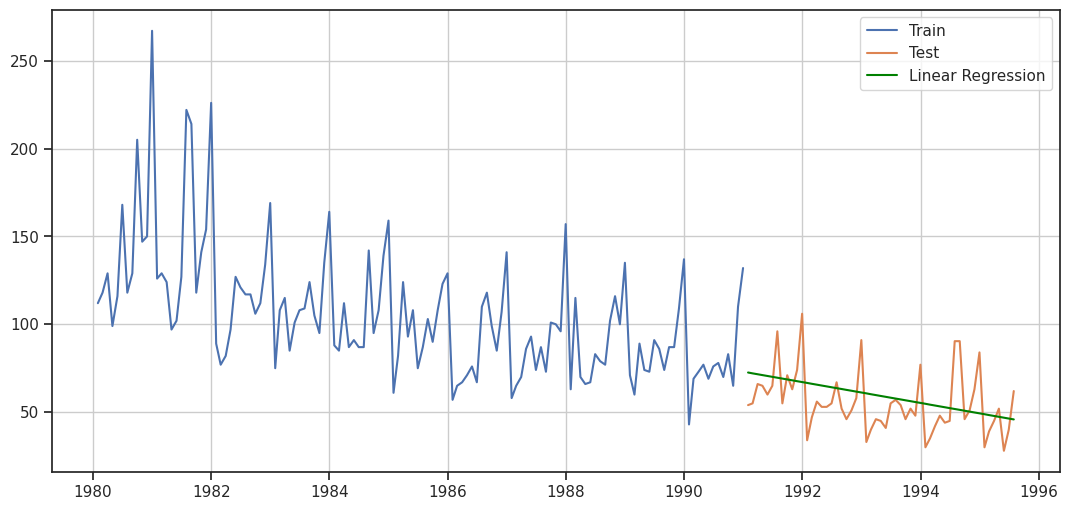

In [41]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])  #Code to make predictions
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green') # Code to plot the predictions made by the model
plt.legend(loc='best')
plt.grid();

In [42]:
## Test Data - RMSE

rmse_model1_test = np.sqrt(mean_squared_error(test['Rose'],test_predictions_model1)) # Complete the code to find the RMSE on test data
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.08


In [43]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  17.080298

## Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data.

In [44]:
MovingAverage = df.copy()
MovingAverage.head()

Rose    Year  Month
YearMonth                       
1980-01-31  112.0  1980.0    1.0
1980-02-29  118.0  1980.0    2.0
1980-03-31  129.0  1980.0    3.0
1980-04-30   99.0  1980.0    4.0
1980-05-31  116.0  1980.0    5.0

In [45]:
#Trailing Moving Average

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean() #to find 2 point trailing average
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean() #to find 4 point trailing average
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean() #to find 6 point trailing average
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean() #to find 9 point trailing average

MovingAverage.head()

Rose    Year  Month  Trailing_2  Trailing_4  Trailing_6  \
YearMonth                                                              
1980-01-31  112.0  1980.0    1.0         NaN         NaN         NaN   
1980-02-29  118.0  1980.0    2.0       115.0         NaN         NaN   
1980-03-31  129.0  1980.0    3.0       123.5         NaN         NaN   
1980-04-30   99.0  1980.0    4.0       114.0       114.5         NaN   
1980-05-31  116.0  1980.0    5.0       107.5       115.5         NaN   

            Trailing_9  
YearMonth               
1980-01-31         NaN  
1980-02-29         NaN  
1980-03-31         NaN  
1980-04-30         NaN  
1980-05-31         NaN

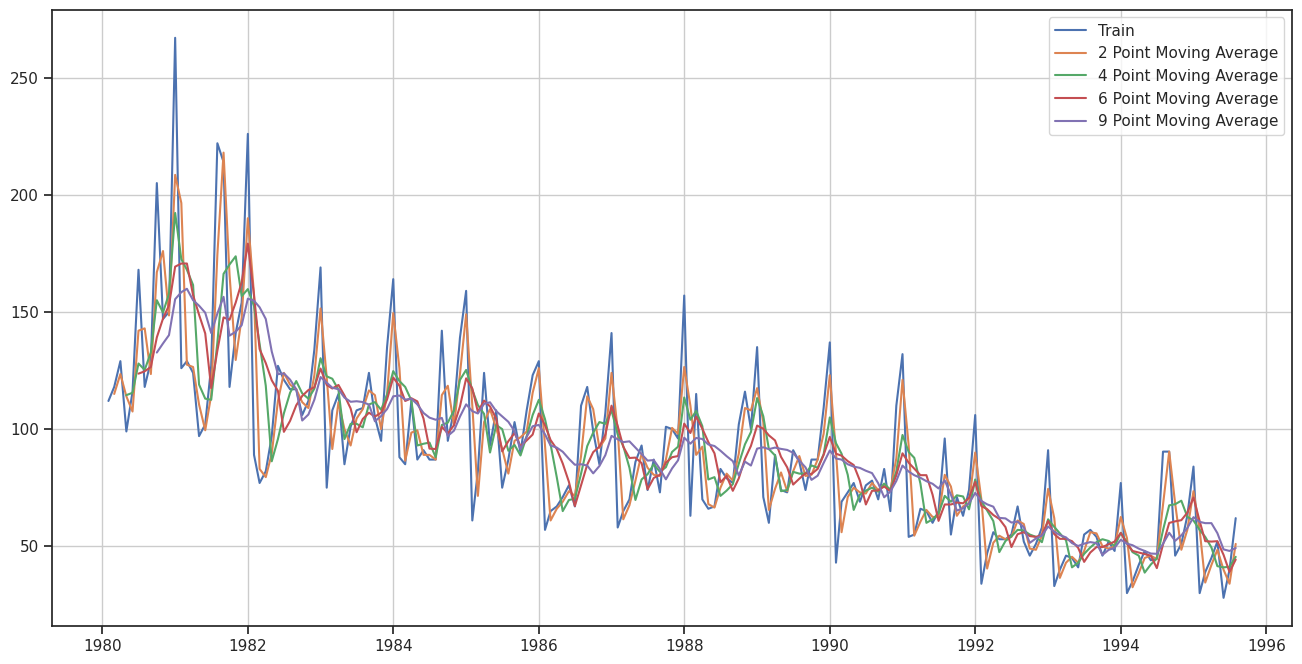

In [46]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average') #Complete the code to plot the 2 point moving average
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average') #Complete the code to plot the 4 point moving average
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average') #Complete the code to plot the 6 point moving average
plt.plot(MovingAverage['Trailing_9'], label='9 Point Moving Average') #Complete the code to plot the 9 point moving average

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [47]:
#Creating train and test set
trailing_MovingAverage_train= MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test= MovingAverage[MovingAverage.index >= '1991-01-01']

In [48]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = np.sqrt(mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'])) #Complete the code to find the RMSE for 2 point moving average
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = np.sqrt(mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'])) #Complete the code to find the RMSE for 4 point moving average
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = np.sqrt(mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6']))   #Complete the code to find the RMSE for 6 point moving average
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_6))


## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = np.sqrt(mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9']))  #Complete the code to find the RMSE for 9 point moving average
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_9))


For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 12.298
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 15.846
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 15.986
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 16.501


In [49]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            17.080298
2pointTrailingMovingAverage  12.298291
4pointTrailingMovingAverage  15.845558
6pointTrailingMovingAverage  15.986163
9pointTrailingMovingAverage  16.500823

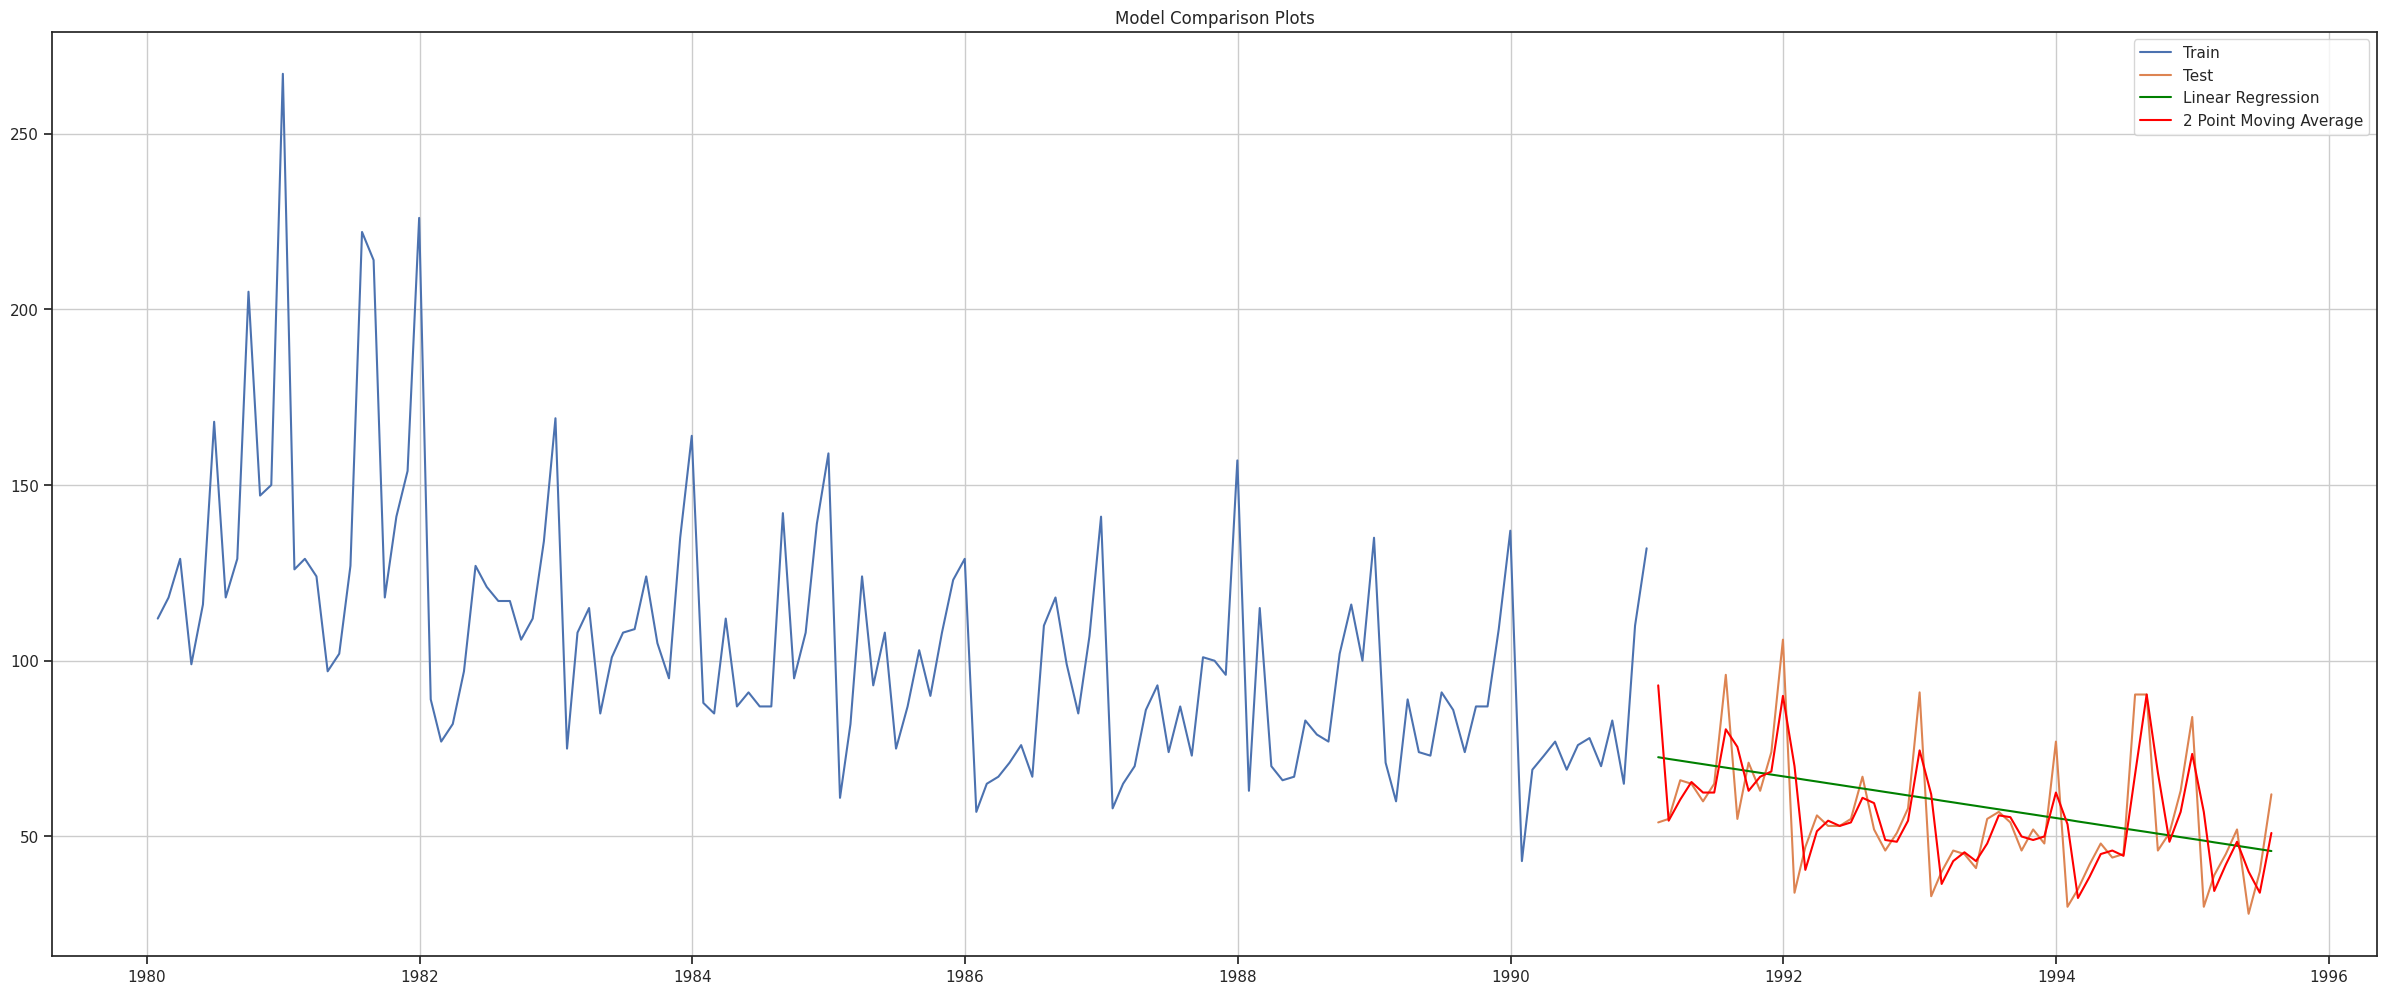

In [50]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

# Code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

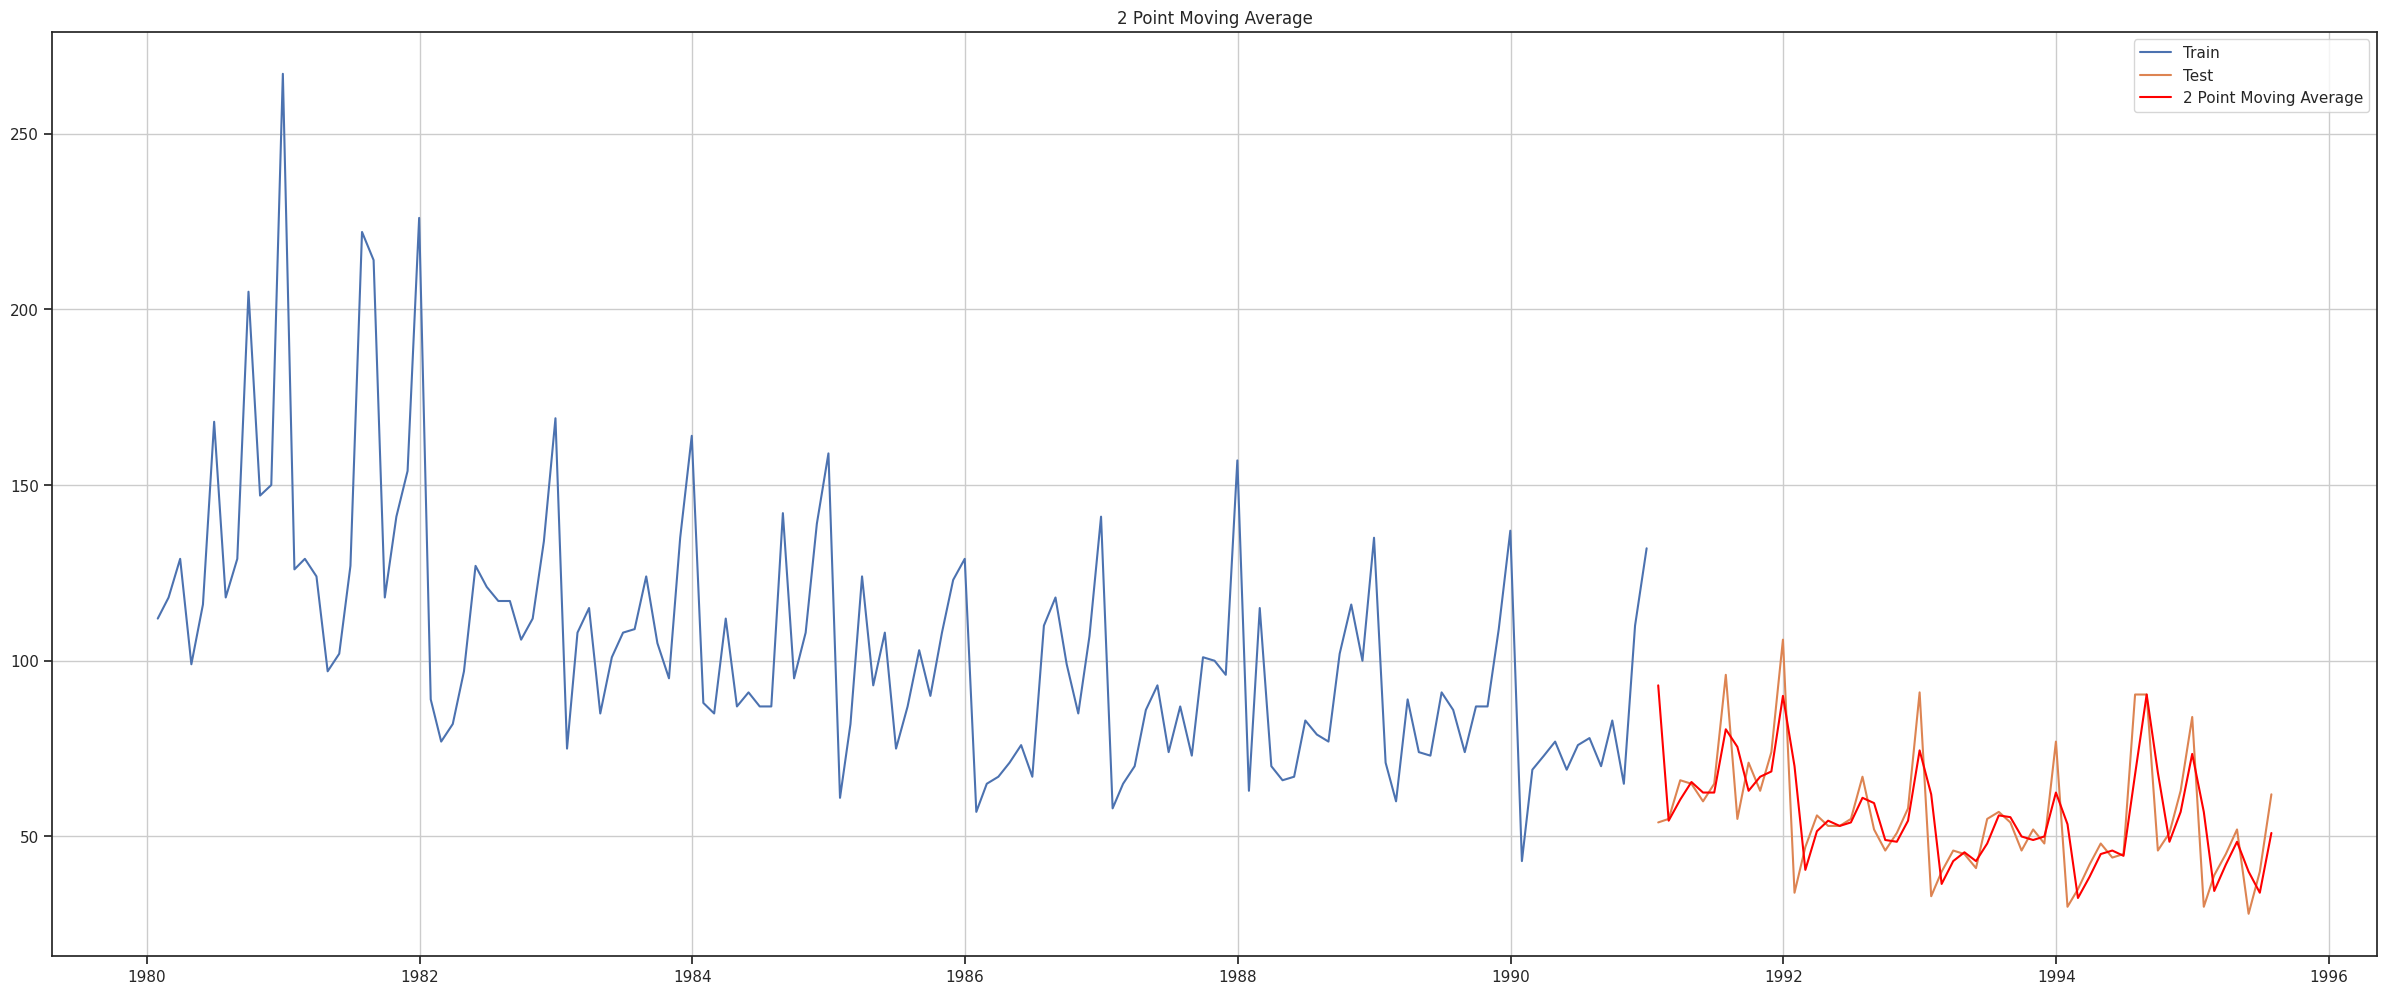

In [51]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')


plt.legend(loc='best')
plt.title("2 Point Moving Average")
plt.grid();

## Simple Exponential Smoothing Model

In [52]:
SES_train = train.copy()
SES_test = test.copy()

In [53]:
model_SES = SimpleExpSmoothing(SES_train['Rose']) #Define the simple exponential smoothening model

In [54]:
model_SES_autofit = model_SES.fit(optimized=True)   #Fit the simple exponential smoothening model

In [55]:
model_SES_autofit.params

{'smoothing_level': np.float64(0.12362013466760018),
 'smoothing_trend': np.float64(nan),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(112.0),
 'initial_trend': np.float64(nan),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))   #Forecast the model
SES_test.head()

Rose    Year  Month    predict
YearMonth                                 
1991-01-31  54.0  1991.0    1.0  87.983765
1991-02-28  55.0  1991.0    2.0  87.983765
1991-03-31  66.0  1991.0    3.0  87.983765
1991-04-30  65.0  1991.0    4.0  87.983765
1991-05-31  60.0  1991.0    5.0  87.983765

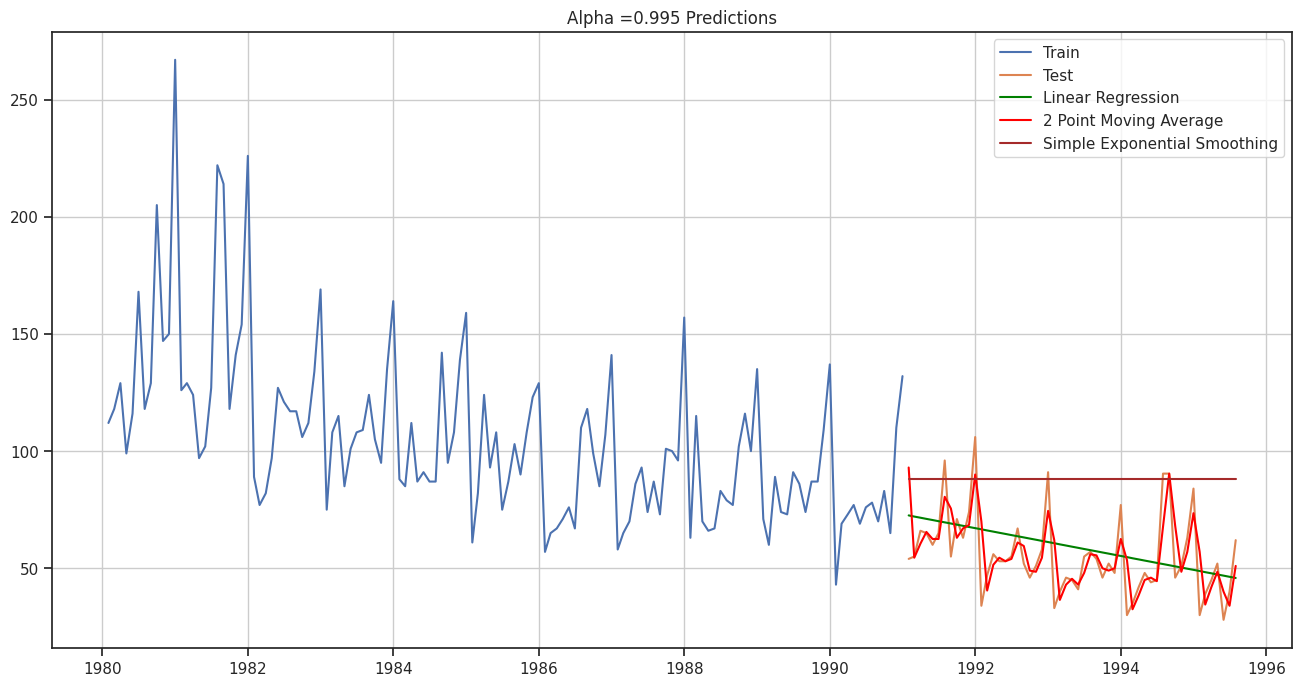

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

# Code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

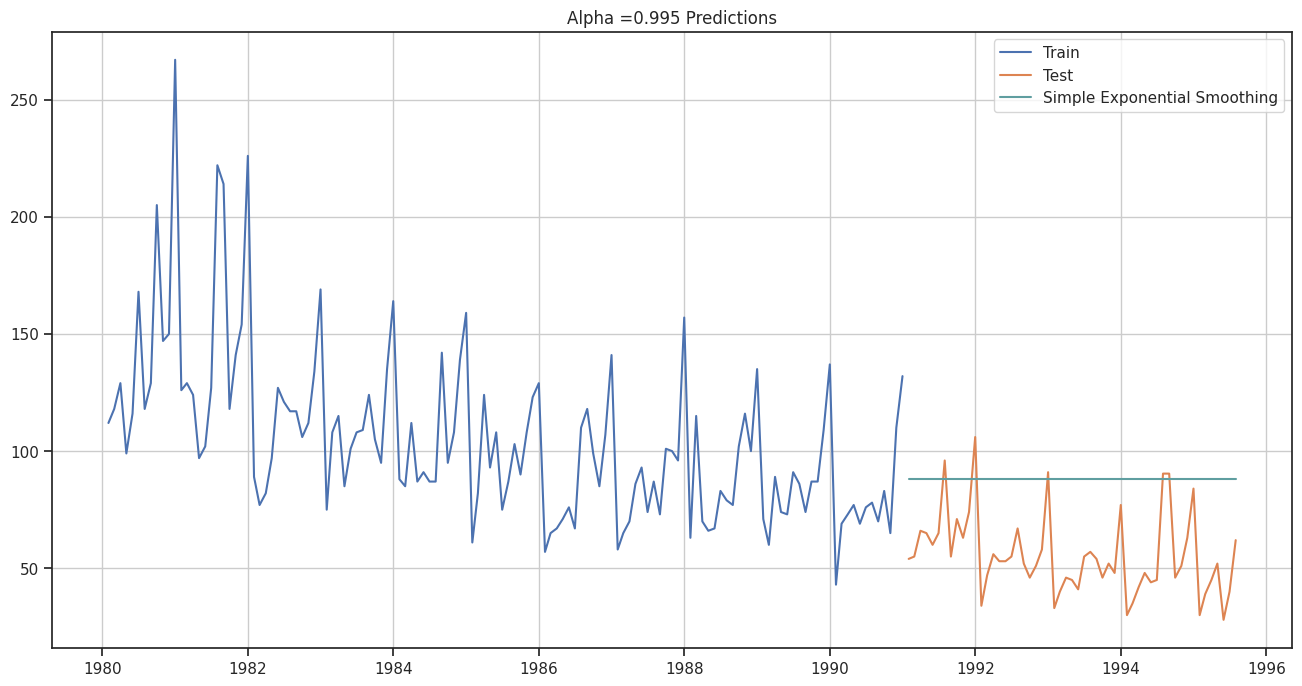

In [58]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
#Code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='cadetblue')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');



*   Model Evaluation for 𝛼 = 0.995 : Simple Exponential Smoothing



In [59]:
## Test Data
#Code to find the RMSE of simple exponential smoothening model
rmse_model5_test_1 = np.sqrt(mean_squared_error(SES_test['Rose'], SES_test['predict']))
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.712


In [60]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                       17.080298
2pointTrailingMovingAverage             12.298291
4pointTrailingMovingAverage             15.845558
6pointTrailingMovingAverage             15.986163
9pointTrailingMovingAverage             16.500823
Alpha=0.995,SimpleExponentialSmoothing  36.711757

##Double Exponential Smoothening (Holt's Model)
Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [61]:
DES_train = train.copy()
DES_test = test.copy()

In [62]:
model_DES = Holt(DES_train['Rose'])

In [63]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [64]:
## First,define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': np.float64(0.16213321015010723),
 'smoothing_trend': np.float64(0.13152155372234675),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(112.0),
 'initial_trend': np.float64(6.0),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Rose    Year  Month    predict
YearMonth                                 
1991-01-31  54.0  1991.0    1.0  87.249993
1991-02-28  55.0  1991.0    2.0  88.152722
1991-03-31  66.0  1991.0    3.0  89.055451
1991-04-30  65.0  1991.0    4.0  89.958180
1991-05-31  60.0  1991.0    5.0  90.860910

In [66]:
##Define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [67]:
## Test Data
rmse_model_temp = np.sqrt(mean_squared_error(SES_test['Rose'],SES_test['predict']))
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 36.712


In [68]:
resultsDf_6 = []
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))

        rmse_model6_train = np.sqrt(mean_squared_error(DES_train['Rose'],DES_train['predict',i,j]))

        rmse_model6_test = np.sqrt(mean_squared_error(DES_test['Rose'],DES_test['predict',i,j]))

        # Append results as a dictionary
        resultsDf_6.append({'Alpha Values': i, 'Beta Values': j, 'Train RMSE': rmse_model6_train, 'Test RMSE': rmse_model6_test})
resultsDf_7 = pd.DataFrame(resultsDf_6)
resultsDf_7

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   35.999680
1            0.1          0.2   33.450729   47.365373
2            0.1          0.3   33.145789   76.462652
3            0.1          0.4   33.262191   97.767003
4            0.1          0.5   33.688415  122.366868
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  799.538675
96           1.0          0.7   54.497039  839.747831
97           1.0          0.8   57.365879  851.819895
98           1.0          0.9   60.474309  832.566741
99           1.0          1.0   63.873454  777.939896

[100 rows x 4 columns]

In [69]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  35.999680
1            0.1          0.2   33.450729  47.365373
10           0.2          0.1   33.097427  64.212172
2            0.1          0.3   33.145789  76.462652
20           0.3          0.1   33.611269  96.915102

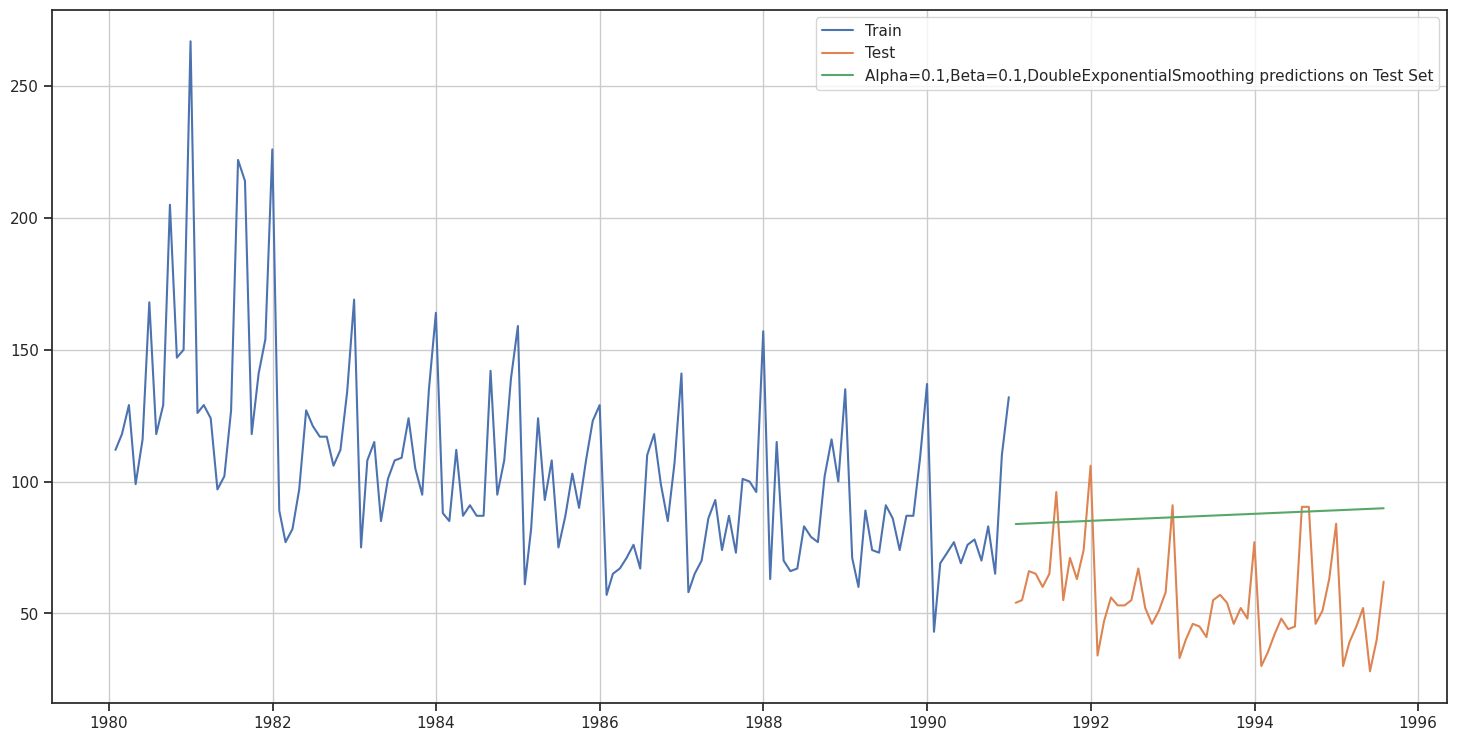

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

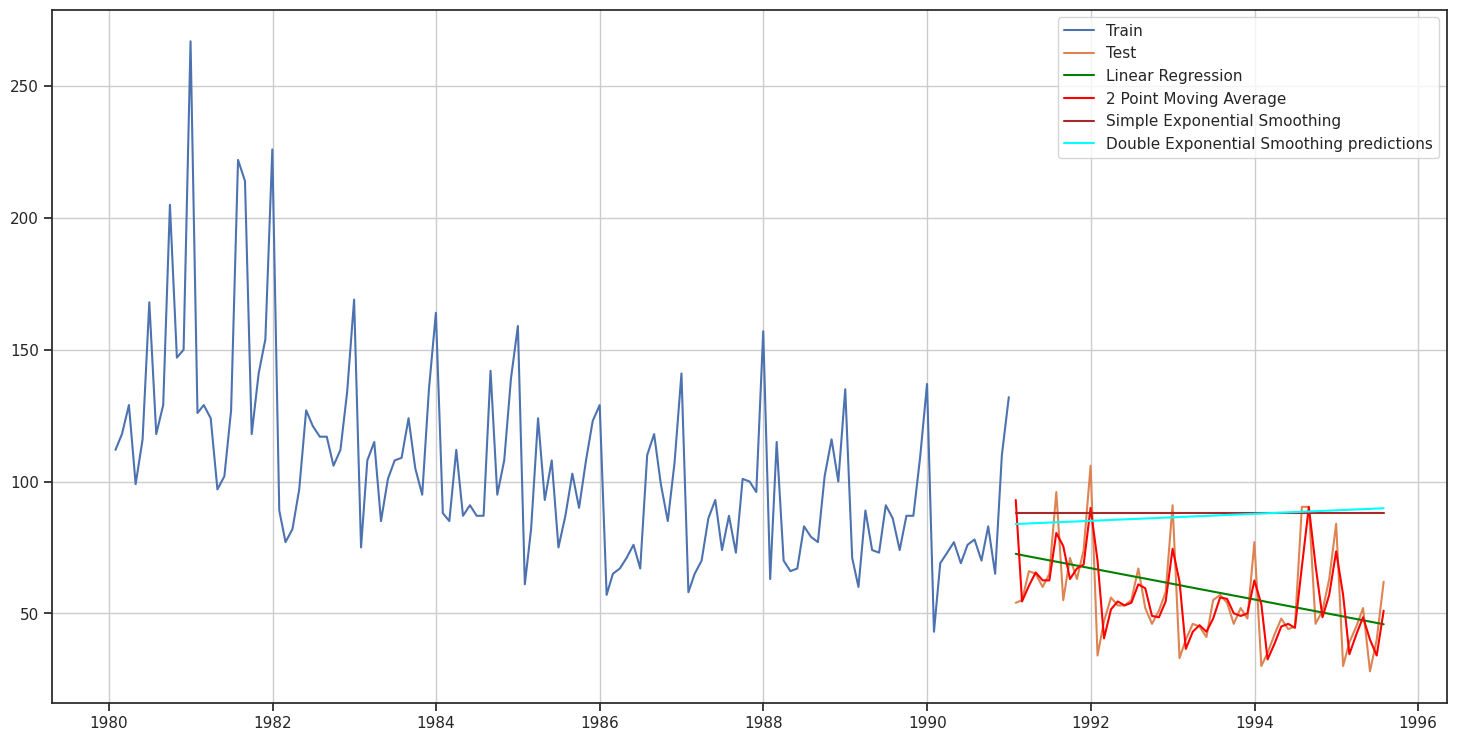

In [71]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

# Code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')


plt.legend(loc='best')
plt.grid();

In [72]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model6_test_1 = np.sqrt(mean_squared_error(DES_test['Rose'], DES_test['predict']))
print("For Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Data, RMSE is %3.3f" %(rmse_model6_test_1))


For Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Data, RMSE is 61.532


In [73]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]},index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                              17.080298
2pointTrailingMovingAverage                    12.298291
4pointTrailingMovingAverage                    15.845558
6pointTrailingMovingAverage                    15.986163
9pointTrailingMovingAverage                    16.500823
Alpha=0.995,SimpleExponentialSmoothing         36.711757
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  61.531528

## Naive Approach

In [74]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [75]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Freq: ME, Name: naive, dtype: float64

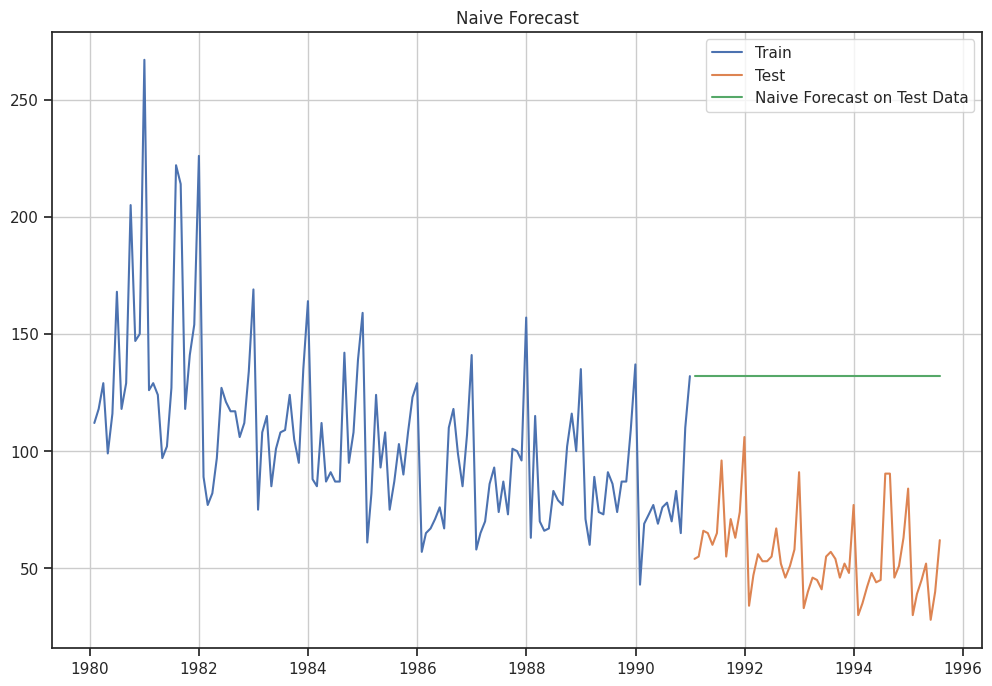

In [76]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [77]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model2_test_1 = np.sqrt(mean_squared_error(NaiveModel_test['Rose'], NaiveModel_test['naive']))
print("Naive Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model2_test_1))


Naive Model forecast on the Test Data, RMSE is 78.396


In [78]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test_1]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression                              17.080298
2pointTrailingMovingAverage                    12.298291
4pointTrailingMovingAverage                    15.845558
6pointTrailingMovingAverage                    15.986163
9pointTrailingMovingAverage                    16.500823
Alpha=0.995,SimpleExponentialSmoothing         36.711757
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  61.531528
Naive Model                                    78.396083

In [79]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage                    12.298291
4pointTrailingMovingAverage                    15.845558
6pointTrailingMovingAverage                    15.986163
9pointTrailingMovingAverage                    16.500823
Linear Regression                              17.080298
Alpha=0.995,SimpleExponentialSmoothing         36.711757
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  61.531528
Naive Model                                    78.396083

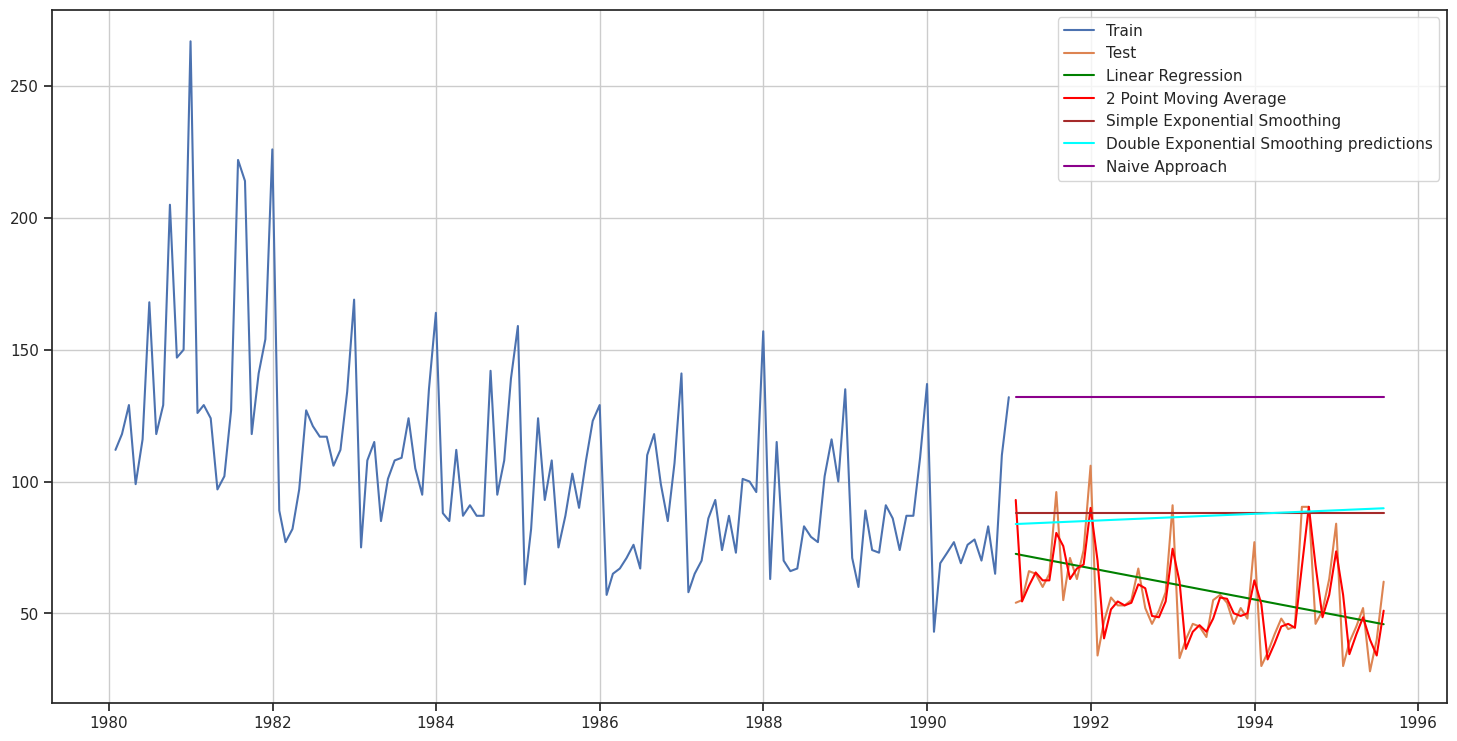

In [80]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')


plt.legend(loc='best')
plt.grid();

## Simple Average

In [81]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [82]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose    Year  Month  mean_forecast
YearMonth                                     
1991-01-31  54.0  1991.0    1.0     104.939394
1991-02-28  55.0  1991.0    2.0     104.939394
1991-03-31  66.0  1991.0    3.0     104.939394
1991-04-30  65.0  1991.0    4.0     104.939394
1991-05-31  60.0  1991.0    5.0     104.939394

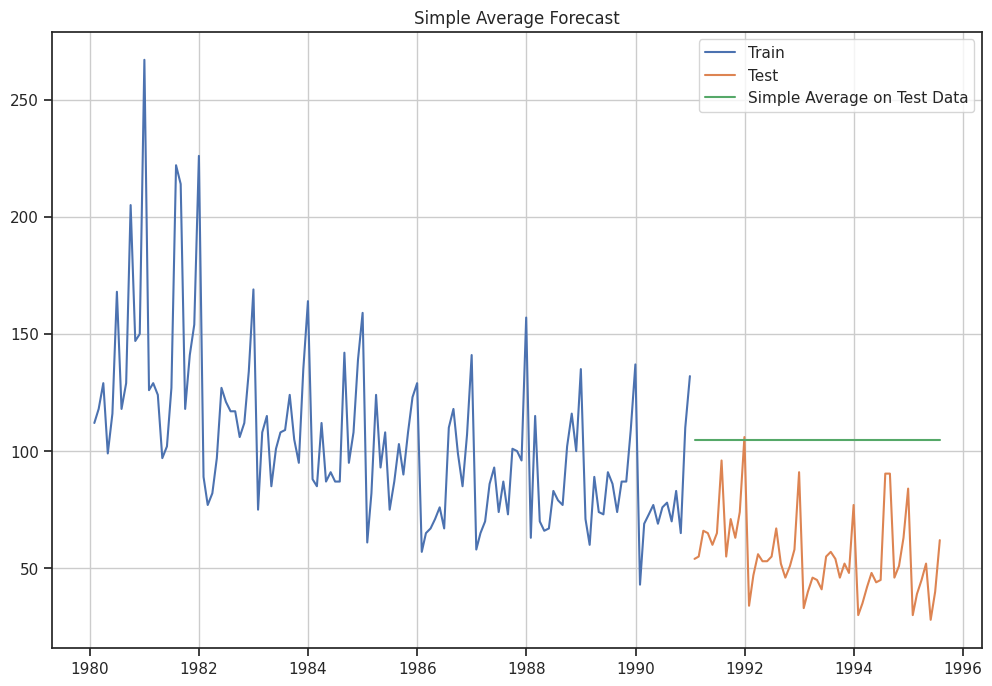

In [83]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [84]:
## Test Data
#Code to find the RMSE of Simple Average model
rmse_model3_test_1 = np.sqrt(mean_squared_error(SimpleAverage_test['Rose'], SimpleAverage_test['mean_forecast']))
print("Simple Average forecast on the Test Data, RMSE is %3.3f" %(rmse_model3_test_1))


Simple Average forecast on the Test Data, RMSE is 52.319


In [85]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test_1]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression                              17.080298
2pointTrailingMovingAverage                    12.298291
4pointTrailingMovingAverage                    15.845558
6pointTrailingMovingAverage                    15.986163
9pointTrailingMovingAverage                    16.500823
Alpha=0.995,SimpleExponentialSmoothing         36.711757
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  61.531528
Naive Model                                    78.396083
Simple Average                                 52.318735

In [86]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage                    12.298291
4pointTrailingMovingAverage                    15.845558
6pointTrailingMovingAverage                    15.986163
9pointTrailingMovingAverage                    16.500823
Linear Regression                              17.080298
Alpha=0.995,SimpleExponentialSmoothing         36.711757
Simple Average                                 52.318735
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  61.531528
Naive Model                                    78.396083

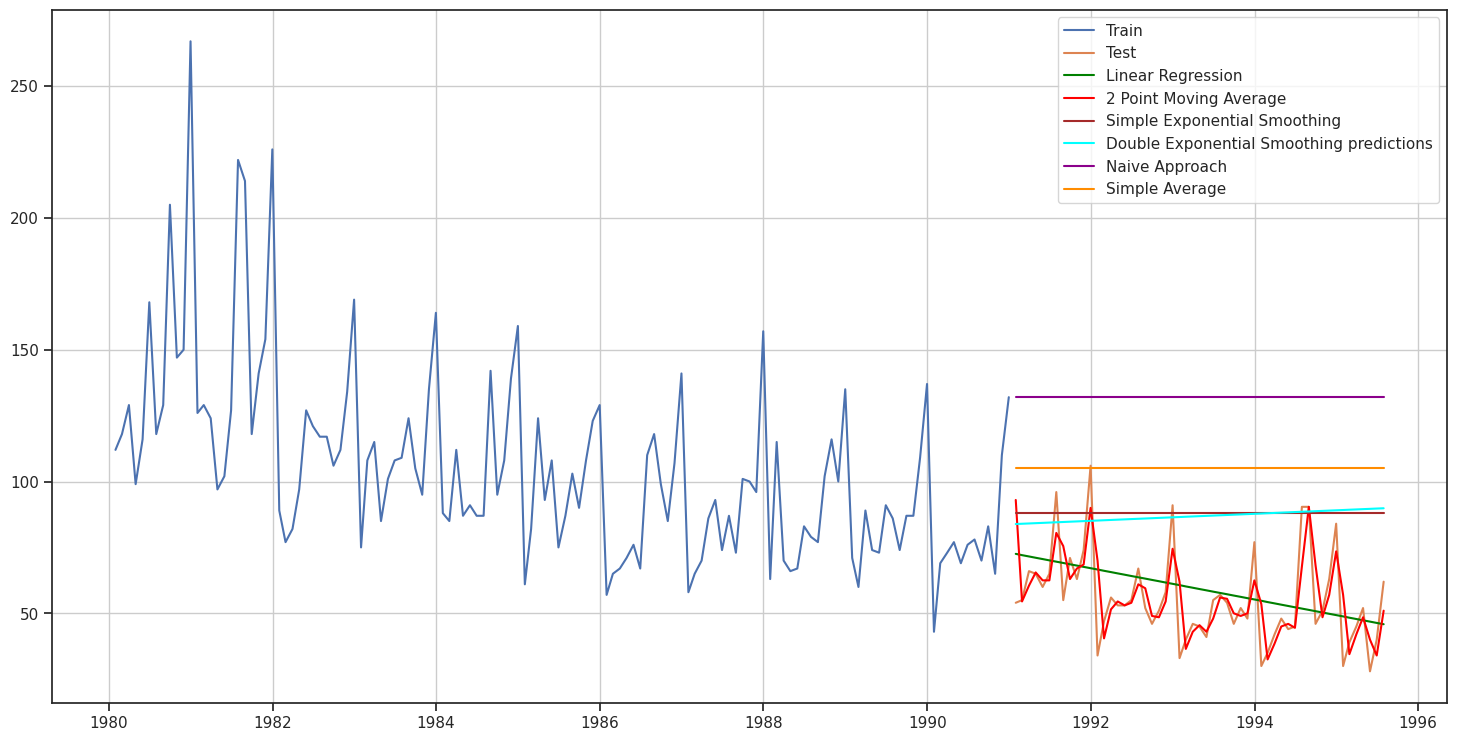

In [87]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')

#Complete the code to plot the predictions based on the Simple Average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average', color='darkorange')


plt.legend(loc='best')
plt.grid();

## Triple Exponential Smoothing (Holt - Winter's Model)

In [88]:
TES_train = train.copy()
TES_test = test.copy()

In [89]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='additive')


In [90]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [91]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [92]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [93]:
model_TES_autofit_ta_sa.params

{'smoothing_level': np.float64(0.08491574907842013),
 'smoothing_trend': np.float64(5.5205494088745035e-06),
 'smoothing_seasonal': np.float64(0.0005477182208247348),
 'damping_trend': nan,
 'initial_level': np.float64(147.05898703809248),
 'initial_trend': np.float64(-0.5496981430927392),
 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
        -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
          4.83969803,   2.95125217,  21.07934859,  63.31472515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [94]:
model_TES_autofit_ta_sm.params

{'smoothing_level': np.float64(0.07736040004765096),
 'smoothing_trend': np.float64(0.03936496779735522),
 'smoothing_seasonal': np.float64(0.0008375039104357999),
 'damping_trend': nan,
 'initial_level': np.float64(156.90674503596637),
 'initial_trend': np.float64(-0.9061396720042346),
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
model_TES_autofit_tm_sm.params

{'smoothing_level': np.float64(0.053527754869099636),
 'smoothing_trend': np.float64(0.03326784064001227),
 'smoothing_seasonal': np.float64(1.1369165069859105e-05),
 'damping_trend': nan,
 'initial_level': np.float64(114.21180446123547),
 'initial_trend': np.float64(0.9923631726352484),
 'initial_seasons': array([0.99382377, 1.12786066, 1.23494689, 1.07812886, 1.21324338,
        1.31945262, 1.44982009, 1.54564845, 1.4653871 , 1.43209206,
        1.67215844, 2.30190104]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
model_TES_autofit_tm_sa.params

{'smoothing_level': np.float64(0.14642857142857144),
 'smoothing_trend': np.float64(0.05324675324675325),
 'smoothing_seasonal': np.float64(0.13131868131868132),
 'damping_trend': nan,
 'initial_level': np.float64(145.27499999999992),
 'initial_trend': np.float64(1.0052617032482805),
 'initial_seasons': array([-30.484375  , -25.046875  , -15.53645833, -30.734375  ,
        -16.46354167,  -9.72395833,  12.44270833,  17.53645833,
          5.55729167,  -3.890625  ,  15.99479167,  80.34895833]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Rose    Year  Month  predict_ta_sa
YearMonth                                     
1991-01-31  54.0  1991.0    1.0      42.574560
1991-02-28  55.0  1991.0    2.0      54.372099
1991-03-31  66.0  1991.0    3.0      61.821511
1991-04-30  65.0  1991.0    4.0      50.671639
1991-05-31  60.0  1991.0    5.0      58.932400

In [98]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Rose    Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                    
1991-01-31  54.0  1991.0    1.0      42.574560      55.942246
1991-02-28  55.0  1991.0    2.0      54.372099      63.240624
1991-03-31  66.0  1991.0    3.0      61.821511      68.899674
1991-04-30  65.0  1991.0    4.0      50.671639      60.007486
1991-05-31  60.0  1991.0    5.0      58.932400      67.257150

In [99]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Rose    Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                   
1991-01-31  54.0  1991.0    1.0      42.574560      55.942246      55.753580
1991-02-28  55.0  1991.0    2.0      54.372099      63.240624      63.084055
1991-03-31  66.0  1991.0    3.0      61.821511      68.899674      68.866825
1991-04-30  65.0  1991.0    4.0      50.671639      60.007486      59.942156
1991-05-31  60.0  1991.0    5.0      58.932400      67.257150      67.252072

In [100]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Rose    Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                      
1991-01-31  54.0  1991.0    1.0      42.574560      55.942246      55.753580   
1991-02-28  55.0  1991.0    2.0      54.372099      63.240624      63.084055   
1991-03-31  66.0  1991.0    3.0      61.821511      68.899674      68.866825   
1991-04-30  65.0  1991.0    4.0      50.671639      60.007486      59.942156   
1991-05-31  60.0  1991.0    5.0      58.932400      67.257150      67.252072   

            predict_tm_sa  
YearMonth                  
1991-01-31      46.284930  
1991-02-28      58.354810  
1991-03-31      64.361205  
1991-04-30      54.433907  
1991-05-31      60.002489

In [101]:
## Test Data

rmse_model_temp_ta_sa = np.sqrt(mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sa']))
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = np.sqrt(mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sm']))
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = np.sqrt(mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sm']))
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = np.sqrt(mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sa']))
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f"
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 15.534
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 18.775
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 19.838
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 17.012


In [102]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       61.531528
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TripleEx...  36.711757

In [103]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [104]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = np.sqrt(mean_squared_error(TES_train['Rose'],TES_train['predict_ta_sa',i,j,k]))

            rmse_model7_test = np.sqrt(mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna()))

            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['ta_sa']})], ignore_index=True)


In [105]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = np.sqrt(mean_squared_error(TES_train['Rose'],TES_train['predict_ta_sm',i,j,k]))

            rmse_model7_test = np.sqrt(mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna()))

            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['ta_sm']})], ignore_index=True)


In [106]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = np.sqrt(mean_squared_error(TES_train['Rose'],TES_train['predict_tm_sm',i,j,k]))

            rmse_model7_test = np.sqrt(mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna()))

            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['tm_sm']})], ignore_index=True)



In [107]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))

            rmse_model7_train = np.sqrt(mean_squared_error(TES_train['Rose'],TES_train['predict_tm_sa',i,j,k]))

            rmse_model7_test = np.sqrt(mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna()))

            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['tm_sa']})], ignore_index=True)

In [108]:
TES_test.head()

Rose    Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                         
1991-01-31  54.0  1991.0    1.0                       45.711834   
1991-02-28  55.0  1991.0    2.0                       56.369270   
1991-03-31  66.0  1991.0    3.0                       63.004762   
1991-04-30  65.0  1991.0    4.0                       51.663022   
1991-05-31  60.0  1991.0    5.0                       58.931424   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-31                       46.537302   
1991-02-28                       60.659980   
1991-03-31                       65.794341   
1991-04-30                       58.369250   
1991-05-31                       61.246579   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-31                                       46.559436   
1991-02-28                                       62.645947   
1991-03-31                                       66.979401   
1991-04-30                                       62.190538   
1991-05-31                                       62.077338   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-31                       46.071952                       45.225493   
1991-02-28                       63.356292                       63.447907   
1991-03-31                       67.649481                       68.330584   
1991-04-30                       64.397061                       65.989684   
1991-05-31                       62.127541                       62.025325   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-31                       44.012323   
1991-02-28                       63.255359   
1991-03-31                       69.025477   
1991-04-30                       67.481555   
1991-05-31                       62.111373   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-31                                      42.371394  ...   
1991-02-28                                      62.959944  ...   
1991-03-31                                      69.443834  ...   
1991-04-30                                      68.978770  ...   
1991-05-31                                      62.439476  ...   

            (predict_tm_sa, 0.9, 0.8, 0.9)  (predict_tm_sa, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-31                    3.735952e+33                       49.121533   
1991-02-28                    7.148786e+32                       37.090349   
1991-03-31                    1.357303e+32                       15.196663   
1991-04-30                    2.576482e+31                       -2.515265   
1991-05-31                   -1.230813e+29                       -1.476818   

            (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-31                       76.518424   
1991-02-28                       76.114781   
1991-03-31                       47.008485   
1991-04-30                        9.602428   
1991-05-31                       -5.631953   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-31                                      376.731488   
1991-02-28                                      509.316662   
1991-03-31                                      593.068850   
1991-04-30                                      669.057836   
1991-05-31                                      759.079023   

            (predict_tm_sa, 0.9, 0.9, 0.4)  (predict_tm_sa, 0.9, 0.9, 0.5)  \
YearMonth                                                           

In [109]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE Method
1010           0.1          0.2           0.1   19.770392  11.757610  ta_sm
1011           0.1          0.2           0.2   20.253487  12.158822  ta_sm
2136           0.2          0.7           0.2   24.042290  12.253129  tm_sm
2009           0.1          0.2           0.1   19.647823  12.476510  tm_sm
1012           0.1          0.2           0.3   20.871304  12.558595  ta_sm

In [110]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf


Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       61.531528
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TripleEx...  36.711757
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610

In [111]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Linear Regression                                   17.080298
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TripleEx...  36.711757
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Simple Average                                      52.318735
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       61.531528
Naive Model                                         78.396083

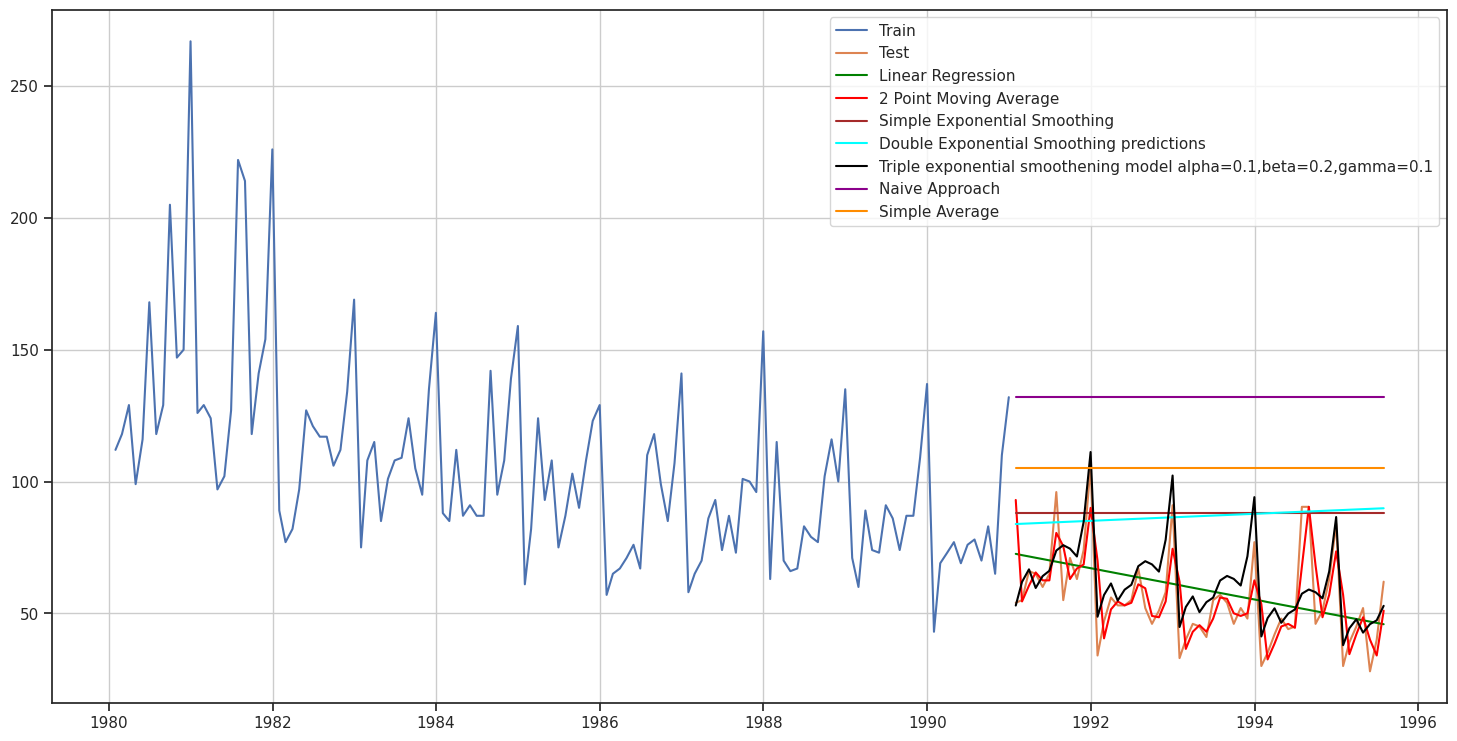

In [112]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['predict_tm_sm',0.1,0.2,0.1], label='Triple exponential smoothening model alpha=0.1,beta=0.2,gamma=0.1', color='black')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')

#Complete the code to plot the predictions based on the Simple Average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average', color='darkorange')


plt.legend(loc='best')
plt.grid();

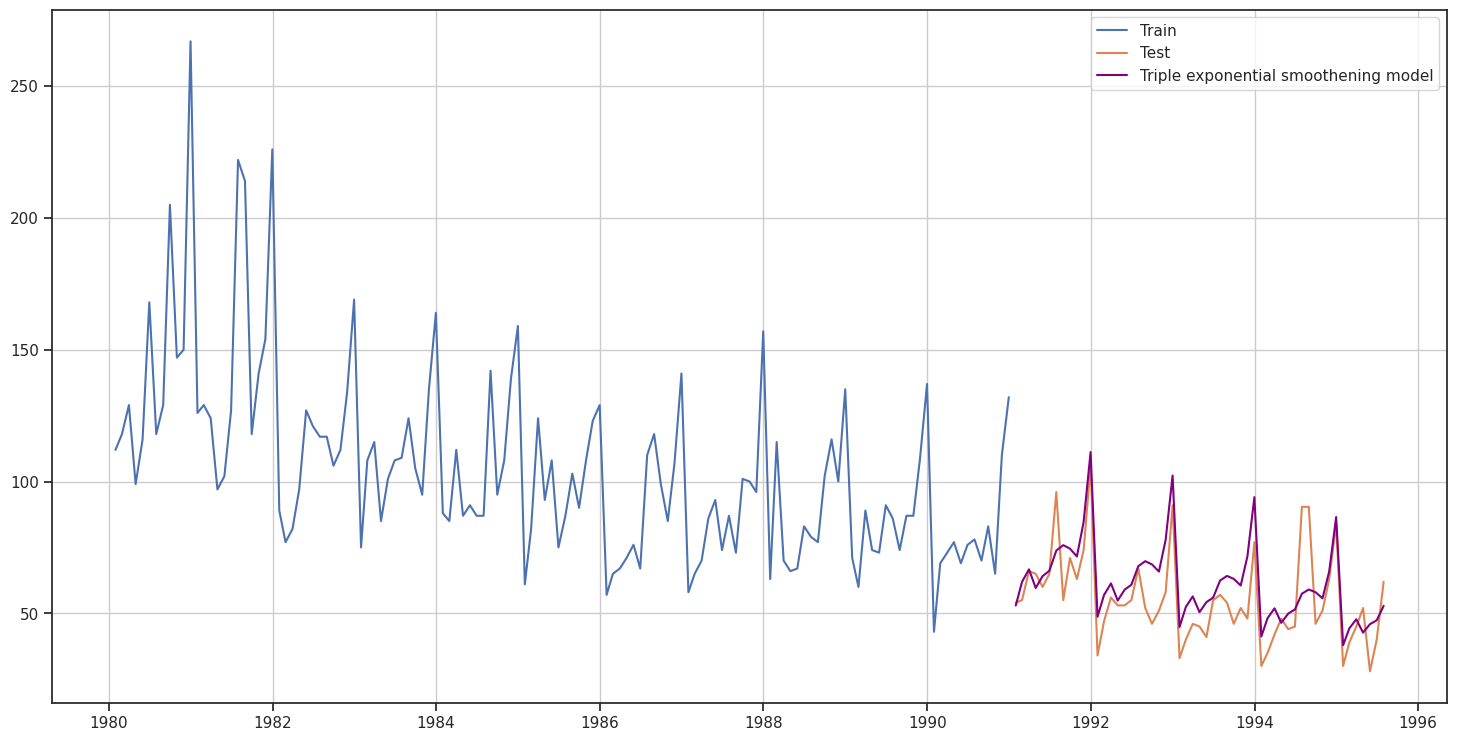

In [113]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['predict_tm_sm',0.1,0.2,0.1], label='Triple exponential smoothening model', color='purple')


plt.legend(loc='best')
plt.grid();

## Box Jenkins Methodology

1. Identification

  *  Analyze plots (ACF, PACF) to guess p, d, q values
  *  Check for stationarity (ADF test, visual inspection)


2. Estimation

  *   Fit the ARIMA/SARIMA model using identified parameters

3. Diagnostic Checking

  *   Examine residuals (ACF of residuals, Ljung-Box test)
  *   Residuals should resemble white noise

4. Forecasting

  *   Use the validated model to make predictions



### Step 1: Identification

#### Stationarity

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

H0 : The Time Series has a unit root and is thus non-stationary.

H1 : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

We see that at 5% significant level the Time Series is non-stationary.

In [114]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(18,9))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

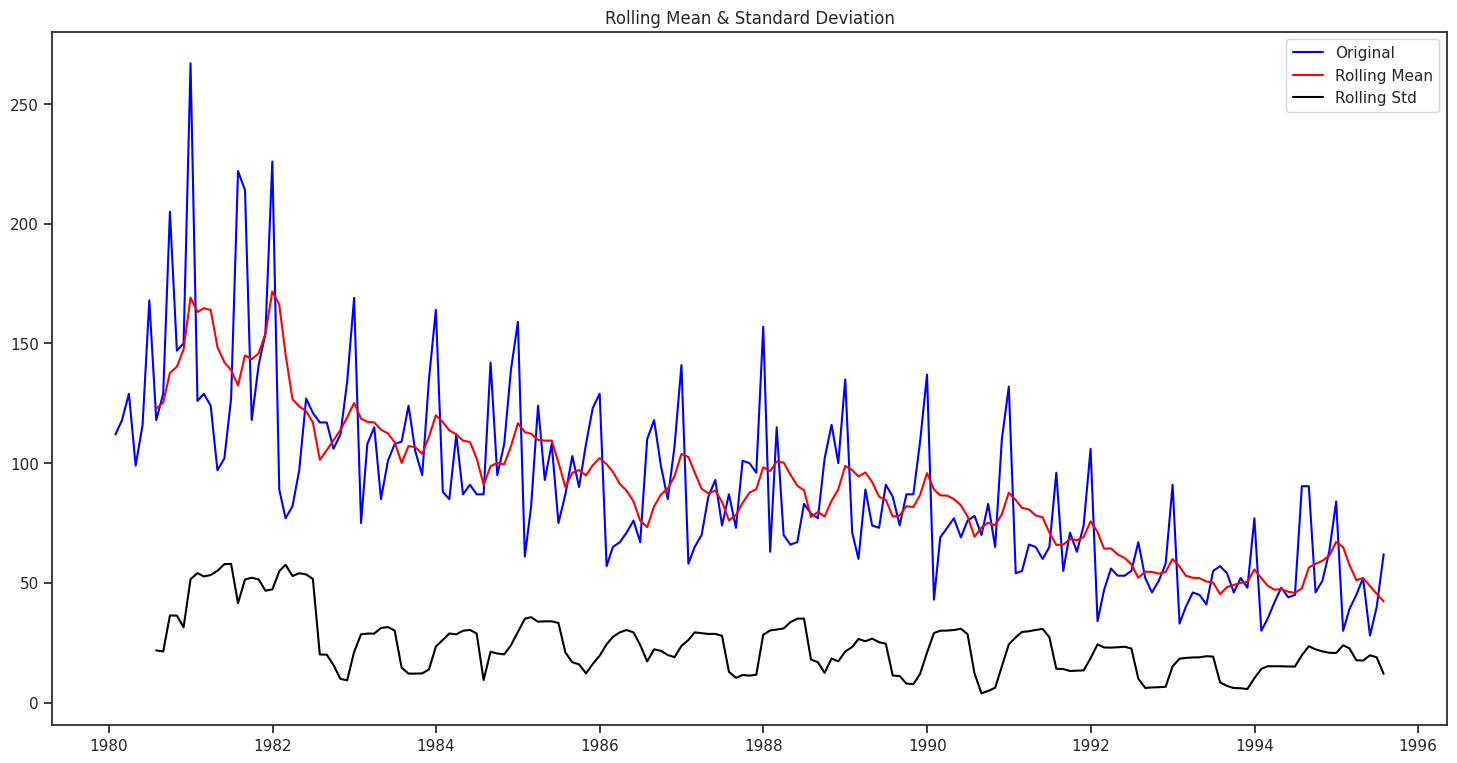

Results of Dickey-Fuller Test:
Test Statistic                  -1.933803
p-value                          0.316330
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [115]:
test_stationarity(df['Rose'])

#### Stationarity using differencing

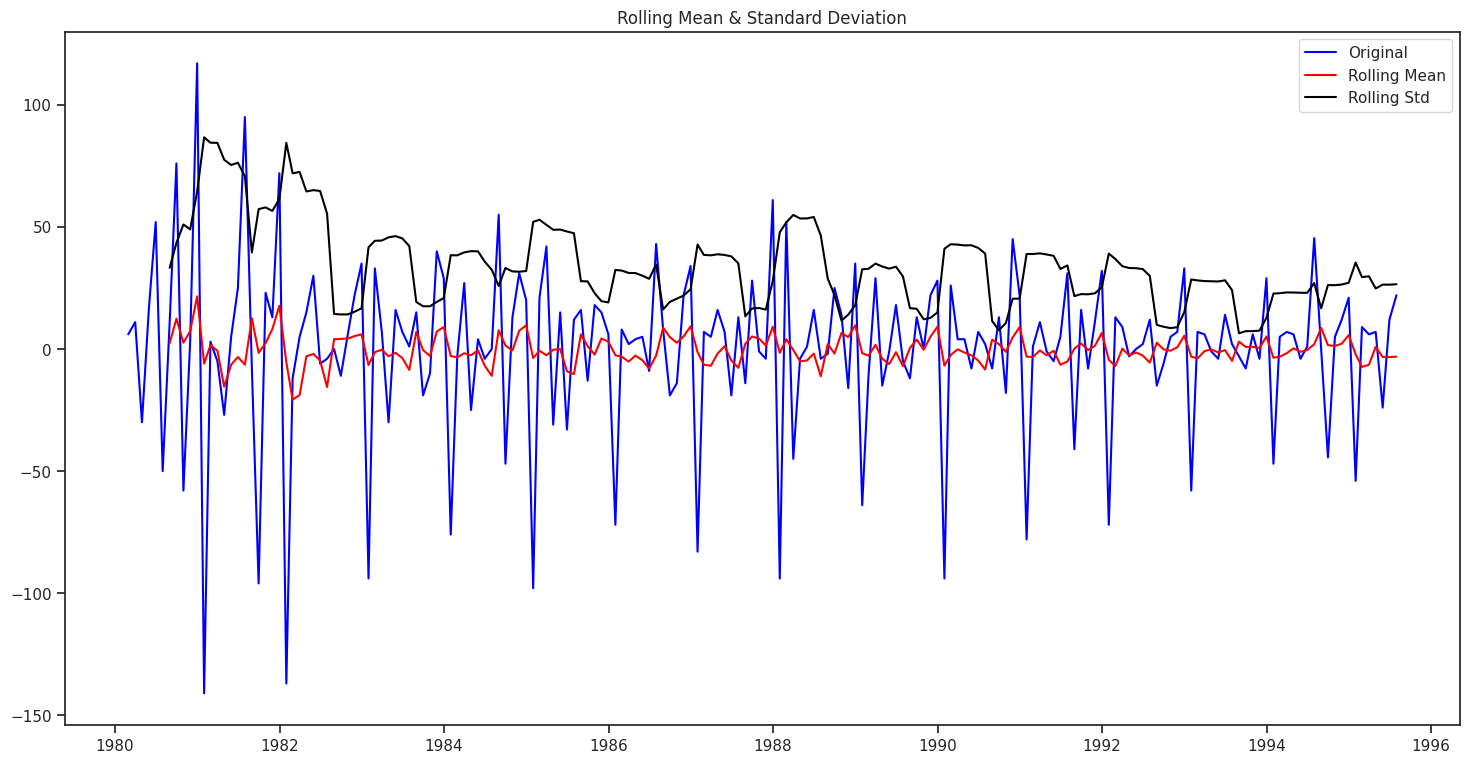

Results of Dickey-Fuller Test:
Test Statistic                -7.855944e+00
p-value                        5.442646e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [116]:
test_stationarity(df['Rose'].diff().dropna())

#### ACF and PACF plots

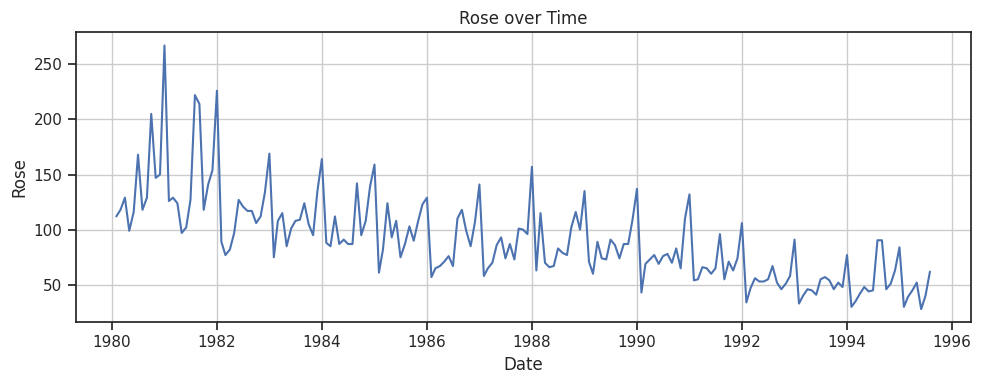

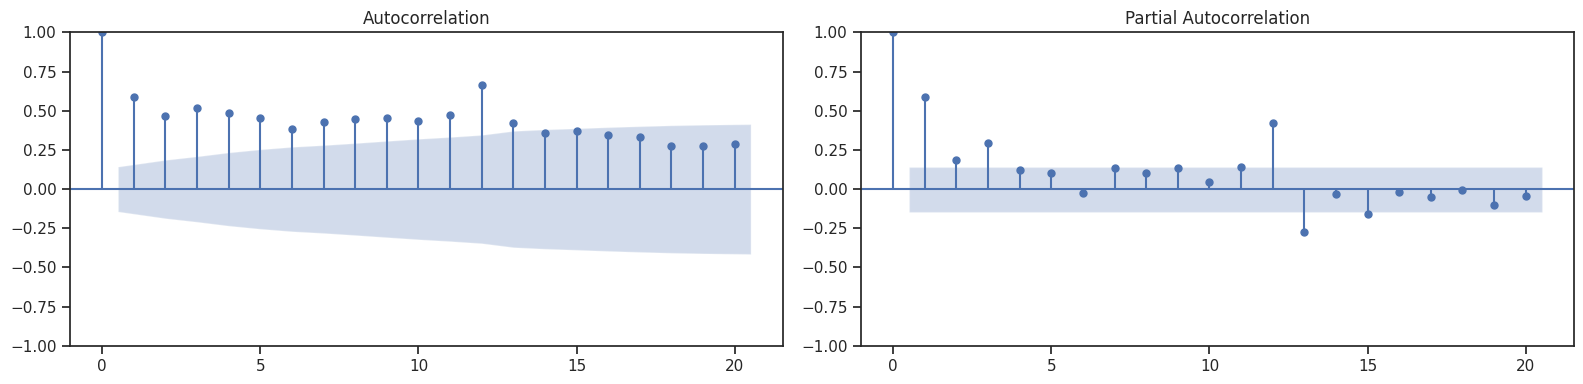

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time series plot
plt.figure(figsize=(10, 4))
plt.plot(df['Rose'])
plt.title('Rose over Time')
plt.xlabel('Date')
plt.ylabel('Rose')
plt.grid(True)
plt.tight_layout()
plt.show()

# ACF and PACF side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
_ = plot_acf(df['Rose'], lags=20, ax=ax[0])
_ = plot_pacf(df['Rose'], lags=20, ax=ax[1])
plt.tight_layout()
plt.show()

### Step 2: Estimation

### Model 1 : Auto ARIMA

In [118]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= [1] #complete the code to ensure stationarity
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [119]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [120]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()  #Fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_AIC))   #Complete the code to find the AIC values
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)

ARIMA(0, 1, 0) - AIC:Empty DataFrame
Columns: [param, AIC]
Index: []
ARIMA(0, 1, 1) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
ARIMA(0, 1, 2) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
ARIMA(0, 1, 3) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (0, 1, 2)  1279.671529
ARIMA(1, 1, 0) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (0, 1, 2)  1279.671529
3  (0, 1, 3)  1280.545376
ARIMA(1, 1, 1) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (0, 1, 2)  1279.671529
3  (0, 1, 3)  1280.545376
4  (1, 1, 0)  1317.350311
ARIMA(1, 1, 2) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (0, 1, 2)  1279.671529
3  (0, 1, 3)  1280.545376
4  (1, 1, 0)  1317.350311
5  (1, 1, 1)  1280.574230
ARIMA(1, 1, 3) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (

In [121]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
11  (2, 1, 3)  1274.695127
15  (3, 1, 3)  1278.658004
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376
5   (1, 1, 1)  1280.574230
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
7   (1, 1, 3)  1281.870722
1   (0, 1, 1)  1282.309832
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
12  (3, 1, 0)  1297.481092
8   (2, 1, 0)  1298.611034
4   (1, 1, 0)  1317.350311
0   (0, 1, 0)  1333.154673

In [122]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3),freq='M')  #Build the ARIMA model based on the best AIC values

results_auto_ARIMA = auto_ARIMA.fit()  #Fit the auto ARIMA model

print(results_auto_ARIMA.summary())   #Print the summary result

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 20 Apr 2025   AIC                           1274.695
Time:                        13:35:29   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.034      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.702      0.000      -0.893      -0.565
ma.L1          1.0447      0.644      1.622      0.1

In [123]:
results_auto_ARIMA

#### Diagnostic Checking

In [124]:
# Get residuals
residuals = results_auto_ARIMA.resid

# Summary of residuals
print(residuals.describe())

count    132.000000
mean      -1.794254
std       31.606609
min      -76.698130
25%      -21.769427
50%       -6.422839
75%       12.733989
max      120.433301
dtype: float64


In [125]:
#Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

     lb_stat  lb_pvalue
10  3.668502   0.961065


Interpretation:

LB Statistic: 3.67 → This is quite low.
p-value: 0.961 → Very high, much greater than 0.05.

Conclusion:

You fail to reject the null hypothesis.
This is a good thing! It means your model's residuals are not significantly autocorrelated.
The ARIMA(2,1,3) model is likely capturing the time series structure well.

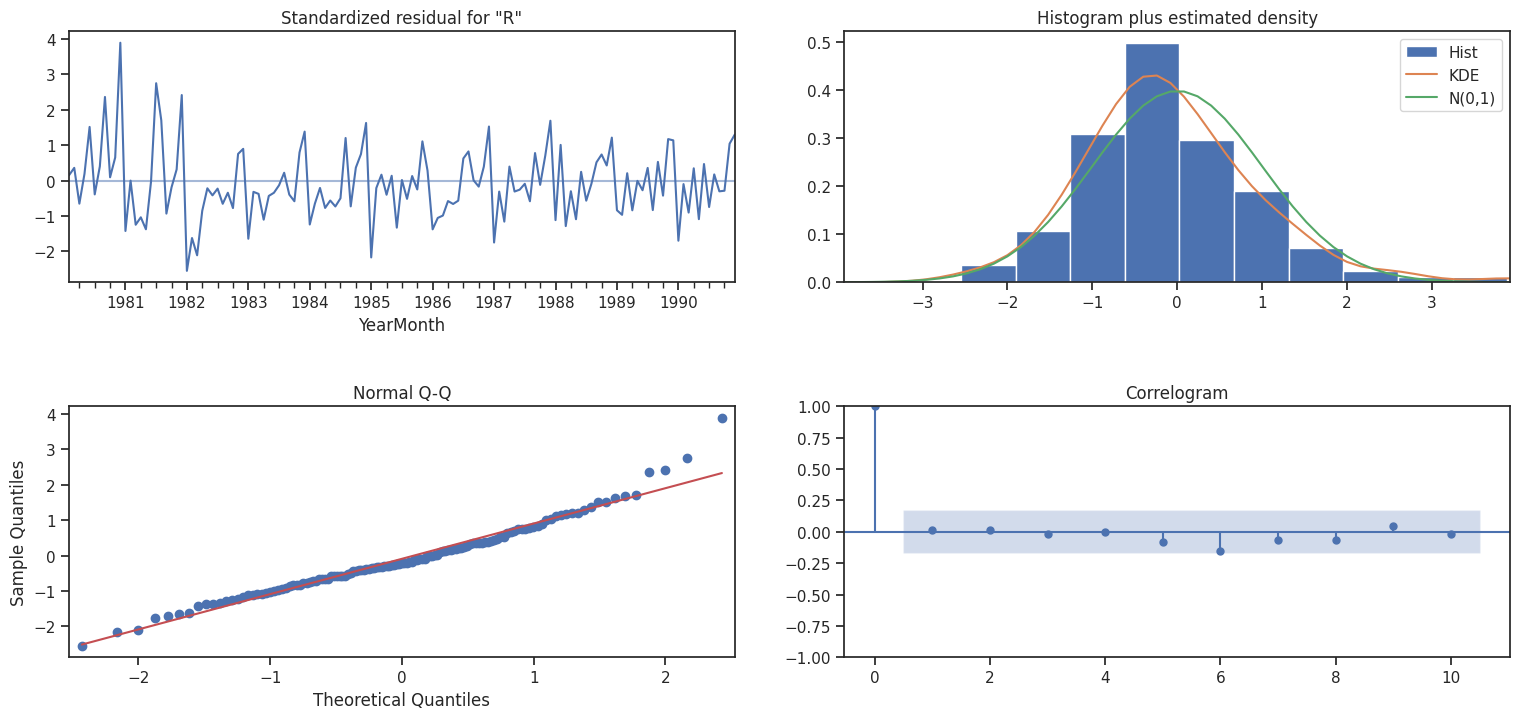

In [126]:
fig = results_auto_ARIMA.plot_diagnostics(figsize=(16, 8))
fig.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()

Residuals are reasonably normally distributed, but the tails are heavier than what you'd expect under perfect normality.This is common in real-world time series.

#### Forecasting

In [127]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))  #Forecast using the auto ARIMA
predicted_auto_ARIMA

1991-01-31    85.615374
1991-02-28    90.529872
1991-03-31    81.971586
1991-04-30    92.750114
1991-05-31    80.901745
1991-06-30    92.927133
1991-07-31    81.384412
1991-08-31    91.988245
1991-09-30    82.608034
1991-10-31    90.619351
1991-11-30    84.013171
1991-12-31    89.259272
1992-01-31    85.271231
1992-02-29    88.139556
1992-03-31    86.233169
1992-04-30    87.341533
1992-05-31    86.871139
1992-06-30    86.852660
1992-07-31    87.226486
1992-08-31    86.612700
1992-09-30    87.370146
1992-10-31    86.546530
1992-11-30    87.376477
1992-12-31    86.584132
1993-01-31    87.308770
1993-02-28    86.670335
1993-03-31    87.213472
1993-04-30    86.767414
1993-05-31    87.120032
1993-06-30    86.853449
1993-07-31    87.043771
1993-08-31    86.918708
1993-09-30    86.989850
1993-10-31    86.961624
1993-11-30    86.957137
1993-12-31    86.985237
1994-01-31    86.941357
1994-02-28    86.994505
1994-03-31    86.937306
1994-04-30    86.994547
1994-05-31    86.940187
1994-06-30    86.989683
1994-07-31    86.946249
1994-08-31    86.983056
1994-09-30    86.952952
1994-10-31    86.976640
1994-11-30    86.958832
1994-12-31    86.971448
1995-01-31    86.963258
1995-02-28    86.967806
1995-03-31    86.966143
1995-04-30    86.965619
1995-05-31    86.967711
1995-06-30    86.964583
1995-07-31    86.968307
Freq: ME, Name: predicted_mean, dtype: float64

In [128]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Rose'],predicted_auto_ARIMA))
print(rmse)

35.96198412084783


In [129]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       61.531528
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TripleEx...  36.711757
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610
Auto_ARIMA                                          35.961984

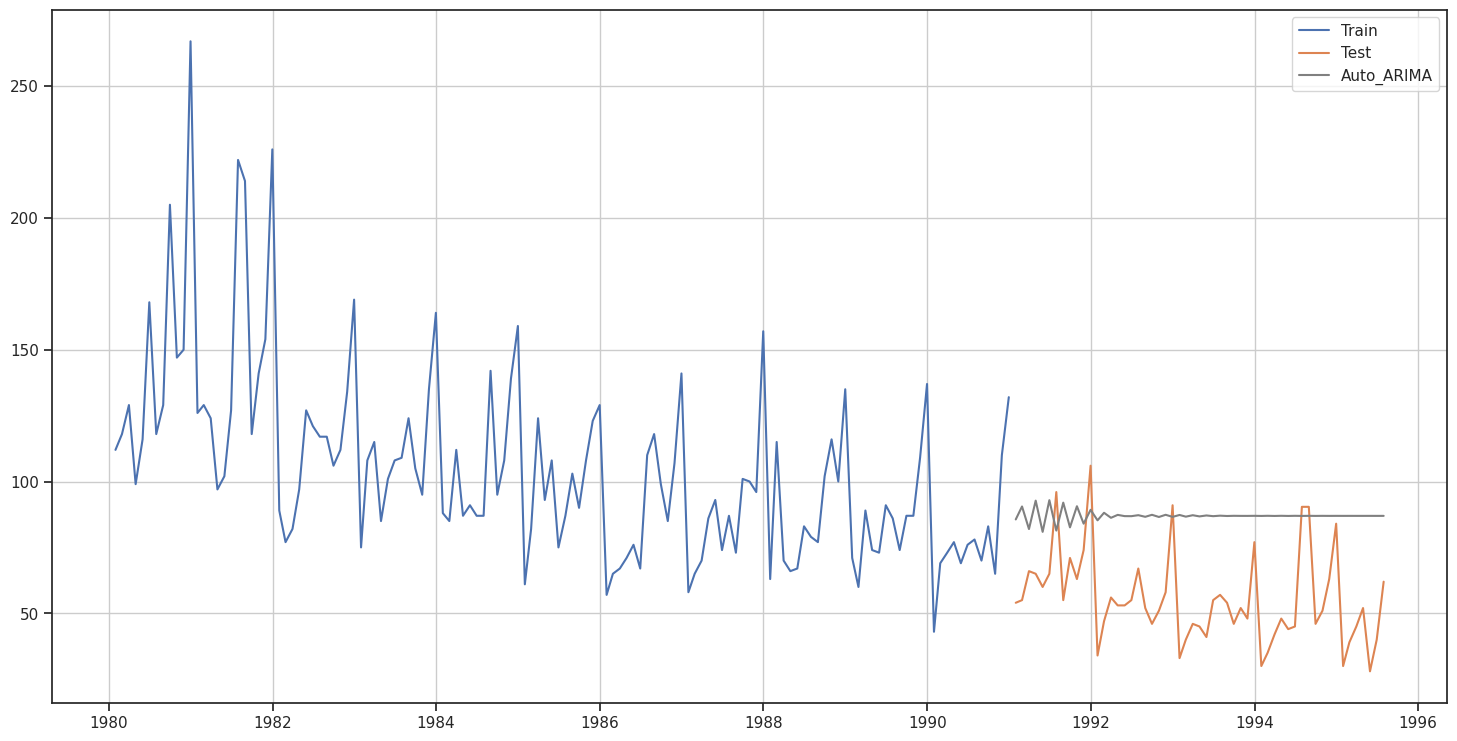

In [130]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

#Code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_auto_ARIMA, label='Auto_ARIMA', color='gray')

plt.legend(loc='best')
plt.grid();


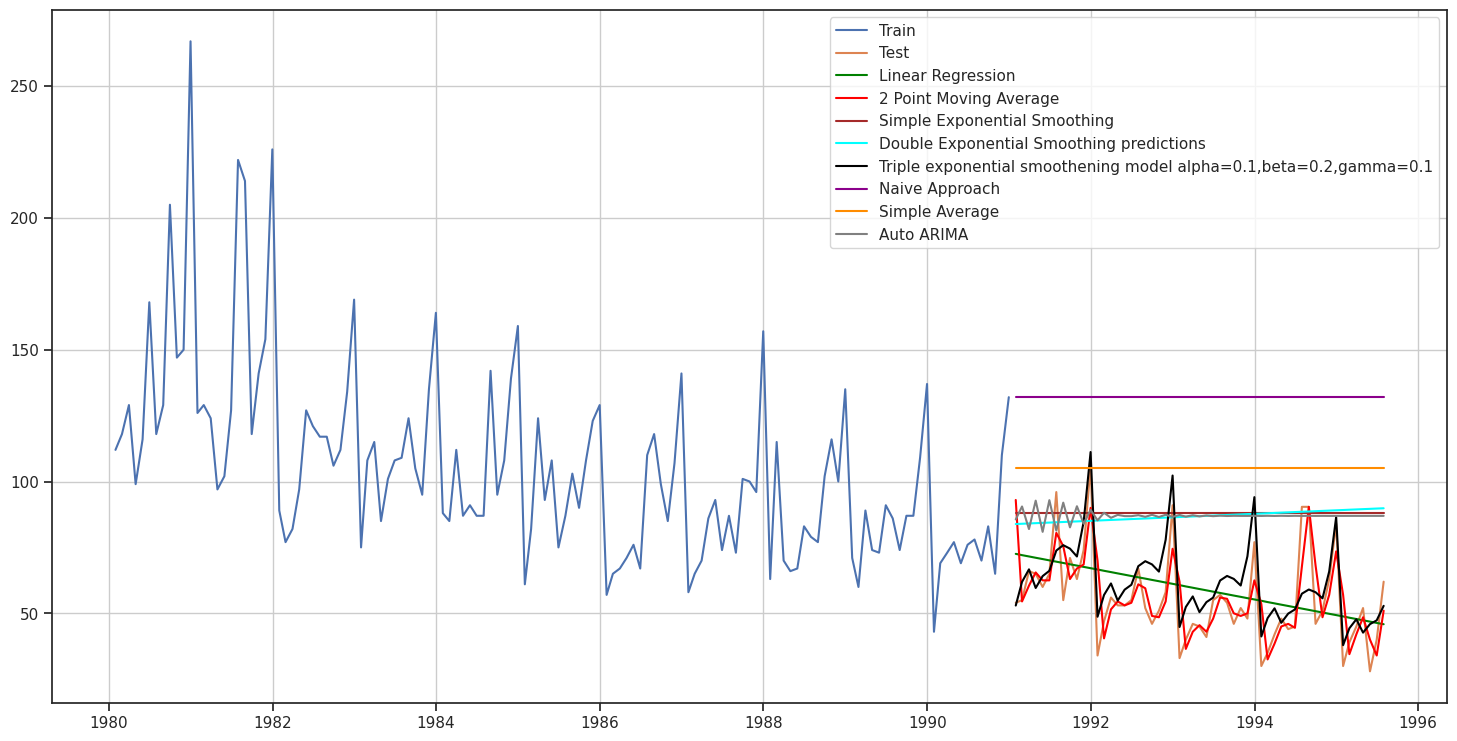

In [131]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['predict_tm_sm',0.1,0.2,0.1], label='Triple exponential smoothening model alpha=0.1,beta=0.2,gamma=0.1', color='black')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')

#Complete the code to plot the predictions based on the Simple Average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average', color='darkorange')

#Complete the code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_auto_ARIMA, label='Auto ARIMA', color='gray')


plt.legend(loc='best')
plt.grid();

### Model 2: Auto SARIMA

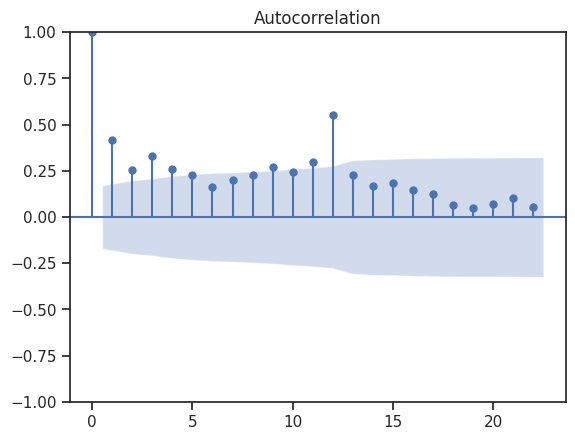

In [132]:
plot_acf(train['Rose'],alpha=0.05);

SARIMA Model building to estimate best parameters

In [133]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [134]:
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# Generate combinations for seasonal p, d, q, and m
seasonal_pdq = list(itertools.product(p, d, q, [12]))

# Initialize an empty DataFrame to store the AIC values
SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

# Iterate over all combinations of pdq and seasonal_pdq
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Define the SARIMA model
            SARIMA_model = SARIMAX(train['Rose'].values,
                                   order=param,
                                   seasonal_order=param_seasonal,
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
            # Fit the model
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            # Print the AIC value
            print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
            # Append the results to the DataFrame using pd.concat
            SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param': [param],
                                                              'seasonal': [param_seasonal],
                                                              'AIC': [results_SARIMA.aic]})], ignore_index=True)
        except Exception as e:
            print(f'SARIMA{param}x{param_seasonal} - Exception: {e}')

# Display the DataFrame with AIC values
print(SARIMA_AIC)


SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1342.8879796320284
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:1127.693967124774
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1132.3491004641107
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:973.2839647242873
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:819.263258315057
SARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:1116.8988882270885
SARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:864.3942215975534
SARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:741.6808601792676
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1123.327544387293
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1072.6552135793058
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:947.516631469874
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:982.5608243528003
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:970.9074505848787
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:821.1204806448335
SARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:899.4677572486003
SARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:863.20530317475
SARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:753.7925832385017
SARIMA(0, 0, 0)x(2, 0, 0, 1

In [135]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

param       seasonal         AIC
161  (0, 1, 2)  (2, 2, 2, 12)  716.792983
143  (0, 1, 2)  (0, 2, 2, 12)  718.350980
404  (1, 1, 2)  (2, 2, 2, 12)  718.768293
485  (1, 2, 2)  (2, 2, 2, 12)  719.164795
476  (1, 2, 2)  (1, 2, 2, 12)  719.411005

In [136]:
auto_SARIMA = SARIMAX(train['Rose'], order=(0,1,2),seasonal_order=(2, 2, 2, 12),enforce_stationarity=False,
                                enforce_invertibility=False)  #Build the ARIMA model based on the best AIC values

results_auto_SARIMA = auto_SARIMA.fit()  #Fit the auto ARIMA model

print(results_auto_SARIMA.summary())   #Print the summary result

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 2, 2, 12)   Log Likelihood                -351.396
Date:                            Sun, 20 Apr 2025   AIC                            716.793
Time:                                    13:51:19   BIC                            733.467
Sample:                                01-31-1980   HQIC                           723.478
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9186   1374.417     -0.001      0.999   -2694.726    2692.889
ma.L2         -0.0814    111.858   

In [137]:
print(results_auto_SARIMA.summary().tables[0])
print(results_auto_SARIMA.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 2, 2, 12)   Log Likelihood                -351.396
Date:                            Sun, 20 Apr 2025   AIC                            716.793
Time:                                    13:51:19   BIC                            733.467
Sample:                                01-31-1980   HQIC                           723.478
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9186   1374.417     -0.001      0.999   -2694.726    2692.889
ma.L2         -0.0814    111.858   

#### Diagnostic Checking

In [138]:
# Get residuals
residuals = results_auto_SARIMA.resid

# Summary of residuals
print(residuals.describe())

count    132.000000
mean      -0.249411
std       54.601949
min     -268.948882
25%      -15.969296
50%        0.582858
75%       16.622694
max      196.643973
dtype: float64


In [139]:
#Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

      lb_stat  lb_pvalue
10  45.141271   0.000002


####  Interpretation:
Null hypothesis (H₀): Residuals are independently distributed (i.e., no autocorrelation up to lag 10).

Alternative hypothesis (H₁): Residuals are not independently distributed (i.e., some autocorrelation exists up to lag 10).


p-value = 0.000002 (very small):

This is far below the typical significance levels (0.05 or 0.01).

So, we reject the null hypothesis.

This means: There is significant autocorrelation in residuals up to lag 10.

Model (SARIMA) may not have fully captured the time series structure.

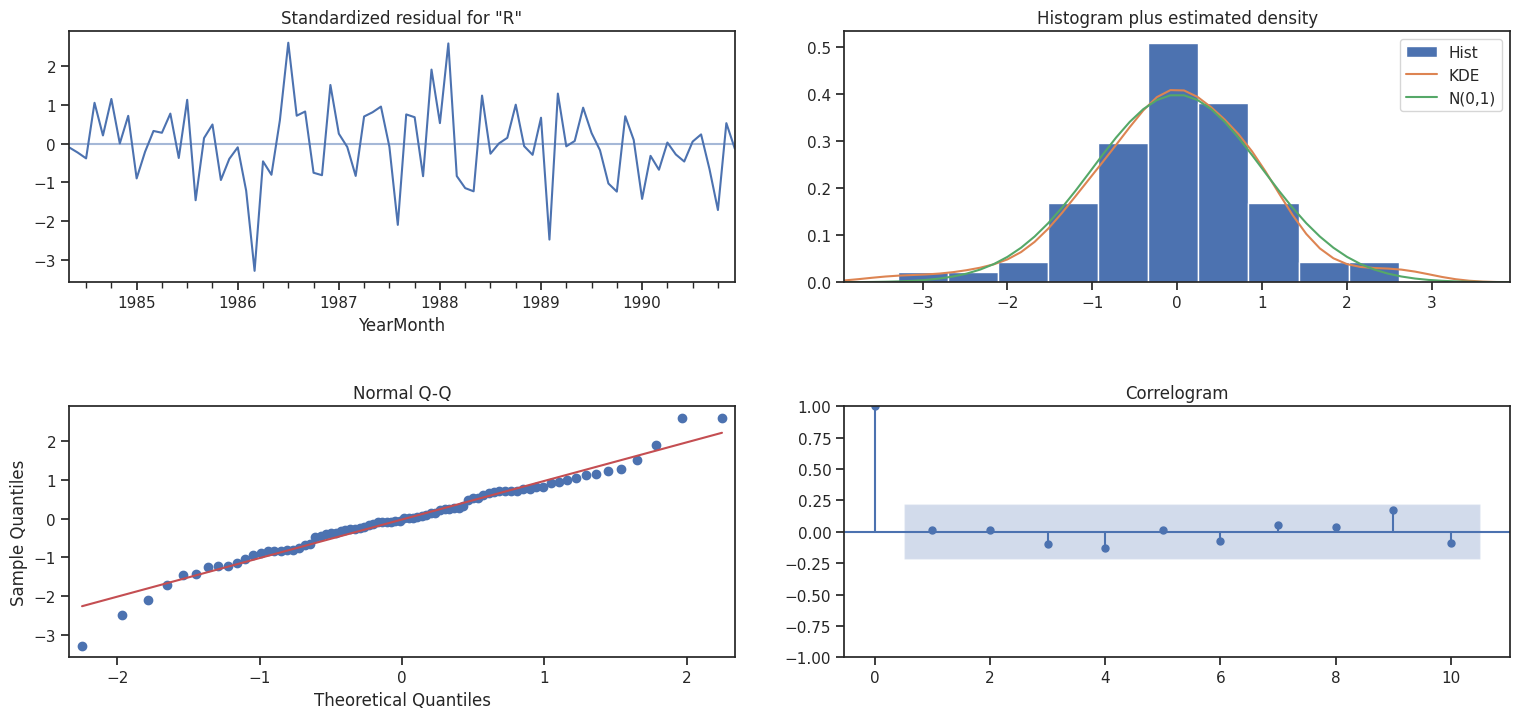

In [140]:
fig = results_auto_SARIMA.plot_diagnostics(figsize=(16, 8))
fig.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()

#### Forecasting

In [141]:
predicted_auto_SARIMA_6 = results_auto_SARIMA.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  50.314012  17.870026      15.289404      85.338621
1991-02-28  79.003497  17.970444      43.782075     114.224919
1991-03-31  78.689729  17.968049      43.473001     113.906458
1991-04-30  77.266514  17.966148      42.053510     112.479517
1991-05-31  67.468825  17.966086      32.255944     102.681706

In [142]:
rmse = np.sqrt(mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean))
print(rmse)

34.26751712309305


In [143]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['order=(0,1,2),seasonal_order=(2, 2, 2, 12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       61.531528
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TripleEx...  36.711757
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610
Auto_ARIMA                                          35.961984
order=(0,1,2),seasonal_order=(2, 2, 2, 12),Auto...  34.267517

### Model 3: Manual ARIMA

#### ACF and PACF plots

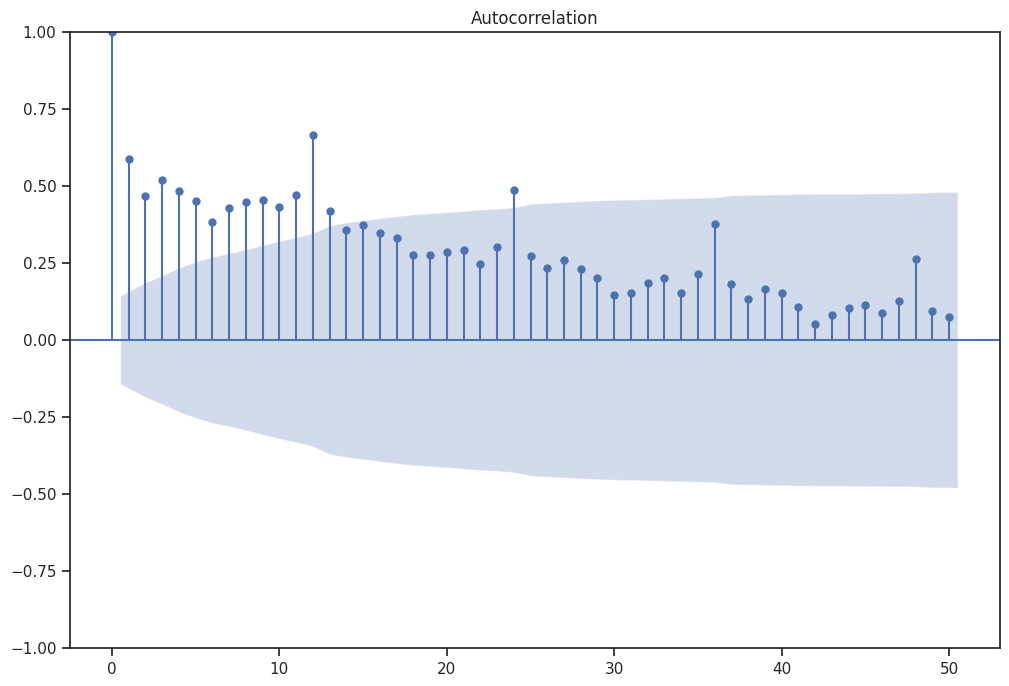

In [144]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_acf(df['Rose'], lags=50, ax=ax)
plt.show()

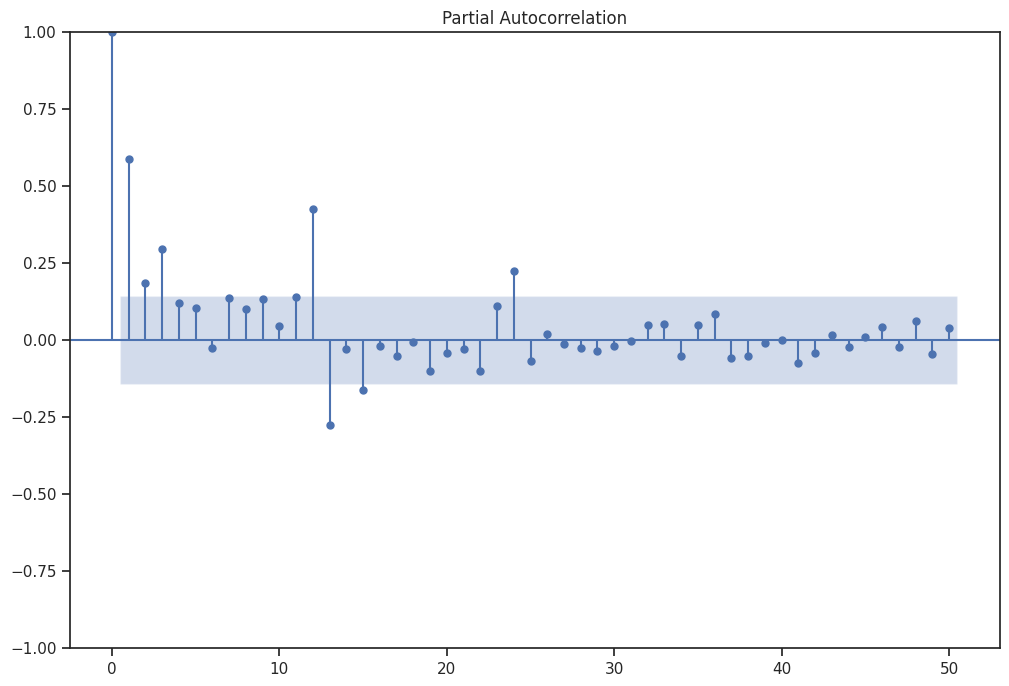

In [145]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_pacf(df['Rose'], lags=50, ax=ax)
plt.show()

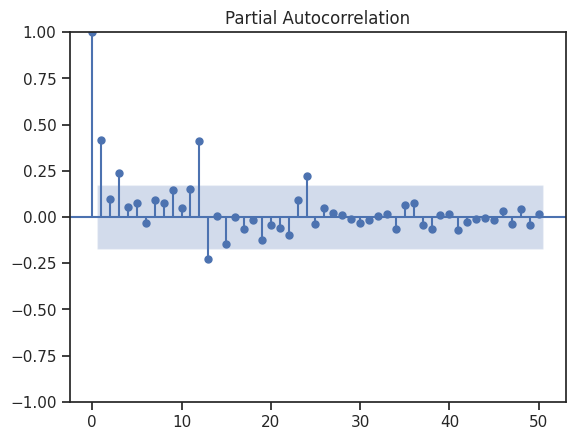

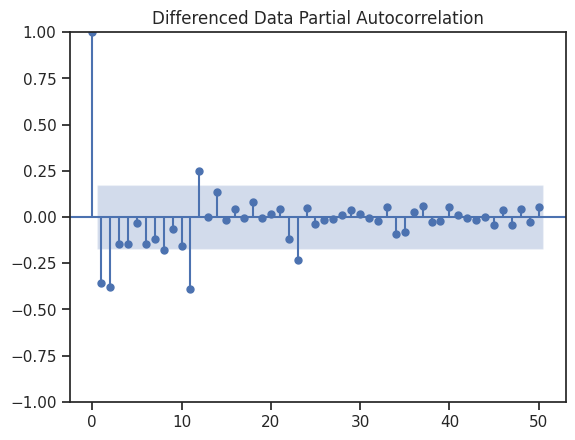

In [146]:
fig1 = plot_pacf(train['Rose'], lags=50)
fig2 = plot_pacf(train['Rose'].diff().dropna(), lags=50, title='Differenced Data Partial Autocorrelation')
plt.show()

In [147]:
manual_ARIMA = ARIMA(train['Rose'], order=(3,1,3))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -632.329
Date:                Sun, 20 Apr 2025   AIC                           1278.658
Time:                        13:51:22   BIC                           1298.784
Sample:                    01-31-1980   HQIC                          1286.836
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5838      0.088    -17.939      0.000      -1.757      -1.411
ar.L2         -0.6387      0.142     -4.497      0.000      -0.917      -0.360
ar.L3          0.1336      0.090      1.492      0.1

#### Diagnostic Checking

In [148]:
# Get residuals
residuals = results_manual_ARIMA.resid

# Summary of residuals
print(residuals.describe())

count    132.000000
mean      -1.955159
std       31.798582
min      -78.524855
25%      -18.211666
50%       -6.318785
75%       13.145676
max      122.992652
dtype: float64


In [149]:
#Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

     lb_stat  lb_pvalue
10  3.061951   0.979928


Interpretation:
Null Hypothesis (H₀): Residuals are white noise (no autocorrelation up to lag 10).

Alternative Hypothesis (H₁): Residuals are autocorrelated up to lag 10.

0.81 is much higher than typical thresholds (e.g. 0.05).

So, we fail to reject the null hypothesis.

🎯 This means: No significant autocorrelation detected in residuals up to lag 10.

In simple terms: model's residuals look like white noise.

📌 Conclusion:
Model is likely a good fit, at least in terms of capturing autocorrelation structure up to lag 10.

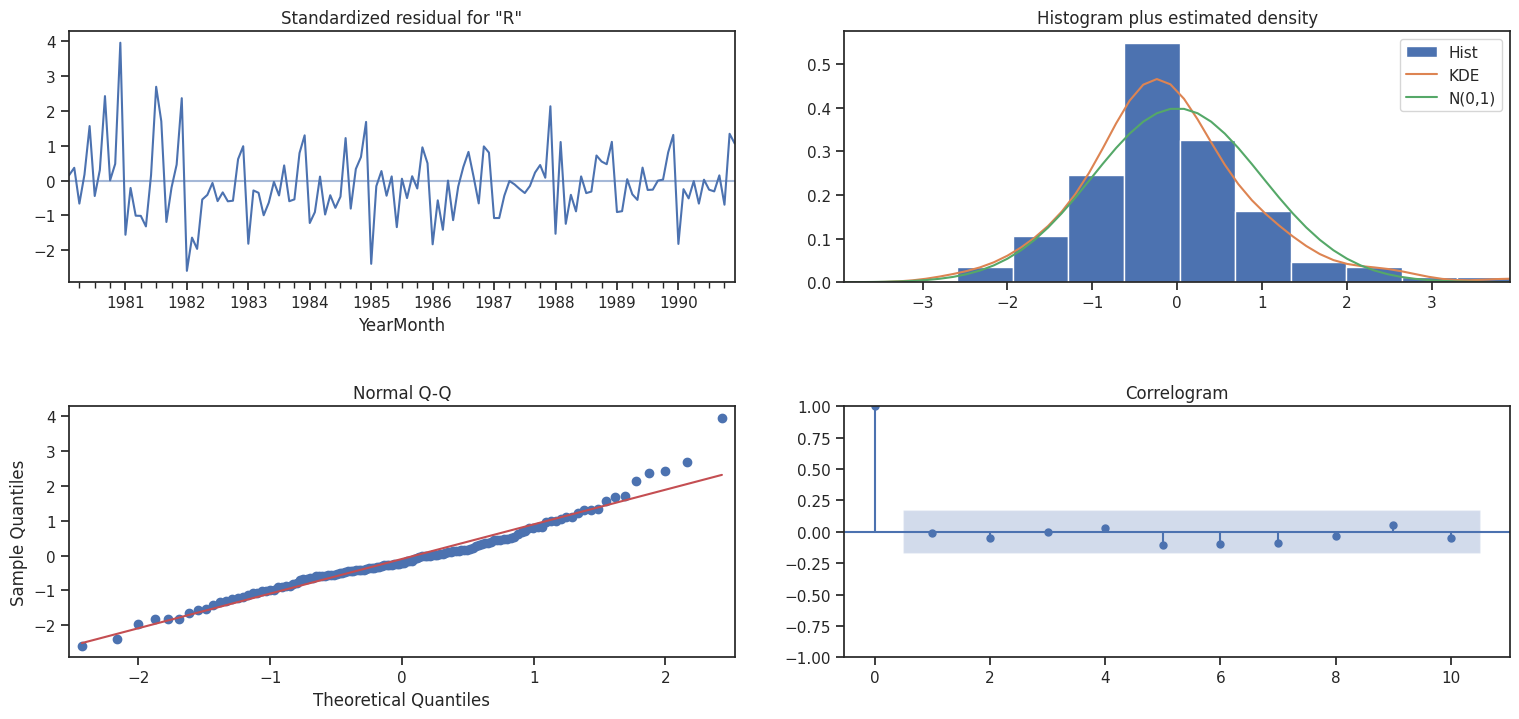

In [150]:
fig = results_manual_ARIMA.plot_diagnostics(figsize=(16, 8))
fig.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()

#### Forecasting

In [151]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))  #Forecast using the auto ARIMA
predicted_manual_ARIMA

1991-01-31    85.742528
1991-02-28    92.056833
1991-03-31    85.874743
1991-04-30    85.454081
1991-05-31    90.912541
1991-06-30    81.710165
1991-07-31    92.742463
1991-08-31    81.876197
1991-09-30    90.810552
1991-10-31    85.074405
1991-11-30    87.001292
1991-12-31    88.806754
1992-01-31    83.950208
1992-02-29    90.746331
1992-03-31    83.325647
1992-04-30    90.089092
1992-05-31    85.024617
1992-06-30    87.734585
1992-07-31    87.580771
1992-08-31    85.416925
1992-09-30    89.304331
1992-10-31    84.508920
1992-11-30    89.331968
1992-12-31    85.275354
1993-01-31    87.979123
1993-02-28    86.932174
1993-03-31    86.321492
1993-04-30    88.318599
1993-05-31    85.405734
1993-06-30    88.662020
1993-07-31    85.631938
1993-08-31    87.962070
1993-09-30    86.641929
1993-10-31    86.839714
1993-11-30    87.680934
1993-12-31    86.045909
1994-01-31    88.124614
1994-02-28    85.989016
1994-03-31    87.825292
1994-04-30    86.558696
1994-05-31    87.106604
1994-06-30    87.293119
1994-07-31    86.478552
1994-08-31    87.722744
1994-09-30    86.297363
1994-10-31    87.651405
1994-11-30    86.583471
1994-12-31    87.219621
1995-01-31    87.075067
1995-02-28    86.755031
1995-03-31    87.439221
1995-04-30    86.540689
1995-05-31    87.484045
1995-06-30    86.655247
1995-07-31    87.245342
Freq: ME, Name: predicted_mean, dtype: float64

In [152]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Rose'],predicted_manual_ARIMA))
print(rmse)

35.84512339673946


In [153]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Manual_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       61.531528
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TripleEx...  36.711757
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610
Auto_ARIMA                                          35.961984
order=(0,1,2),seasonal_order=(2, 2, 2, 12),Auto...  34.267517
Manual_ARIMA                                        35.845123

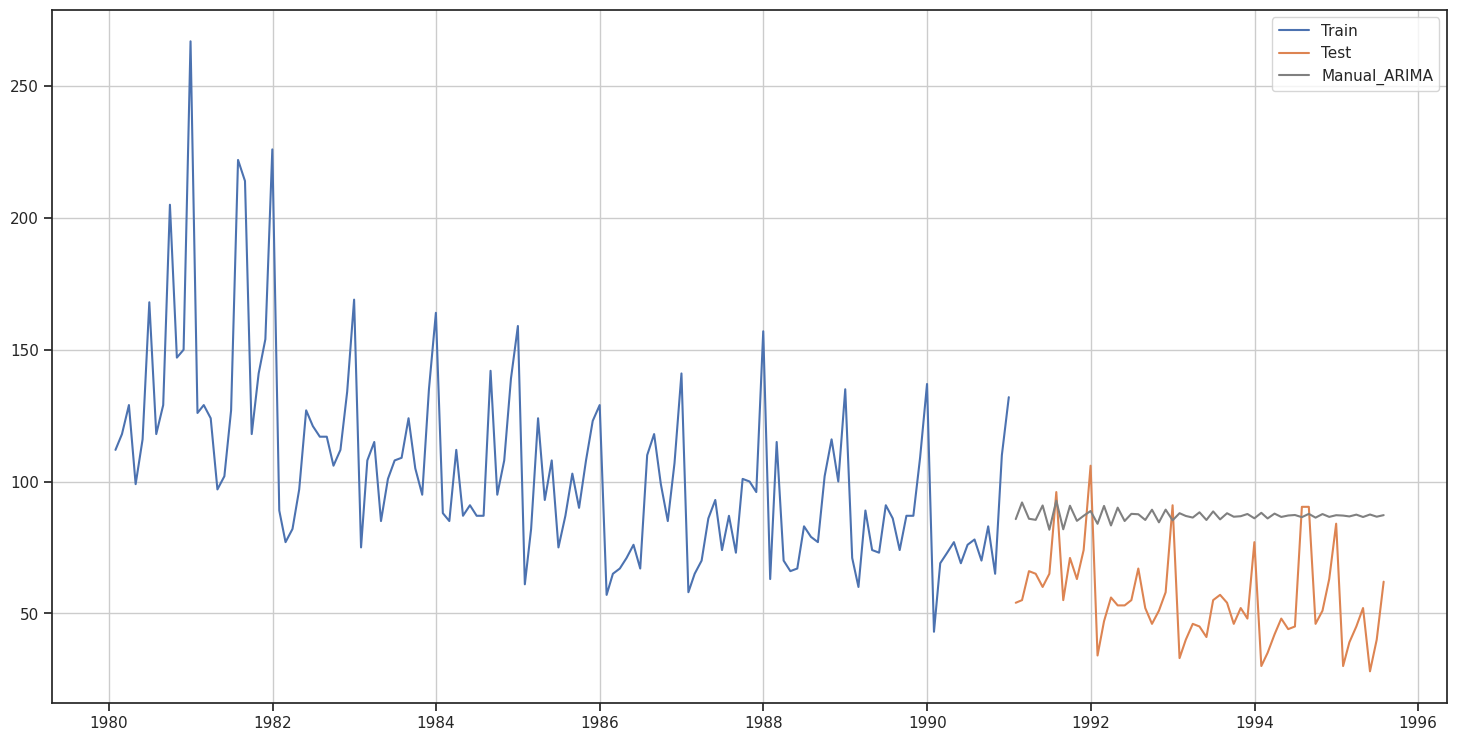

In [154]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

#Code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_manual_ARIMA, label='Manual_ARIMA', color='gray')

plt.legend(loc='best')
plt.grid();

## Model 4: Manual SARIMA

In [155]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Define the parameters for the SARIMA model
param = (1, 1, 1)  # Example values for (p, d, q)
param_seasonal = (1, 1, 1, 12)  # Example values for (P, D, Q, s)

# Fit the SARIMA model with specified parameters
SARIMA_model_manual = SARIMAX(train['Rose'].values,
                              order=param,
                              seasonal_order=param_seasonal,
                              enforce_stationarity=False,
                              enforce_invertibility=False)

results_manual_SARIMA = SARIMA_model_manual.fit(maxiter=1000)

# Forecast using the fitted model
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
forecast_manual_SARIMA = predicted_manual_SARIMA.predicted_mean




Diagnostic Checking

In [156]:
# Get residuals
residuals = results_manual_SARIMA.resid

# Convert residuals to a Pandas Series
residuals_series = pd.Series(residuals)

# Now you can call describe
print(residuals_series.describe())


count    132.000000
mean       1.916714
std       37.506019
min     -212.918405
25%      -10.509862
50%        1.252413
75%       15.793770
max      138.022526
dtype: float64


In [157]:
#Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

      lb_stat  lb_pvalue
10  36.890836   0.000059


Interpretation:
Null Hypothesis (H₀): The residuals are white noise (no autocorrelation up to lag 10).

Alternative Hypothesis (H₁): The residuals are autocorrelated (there's some autocorrelation present up to lag 10).

p-value = 0.000059 (very small):

This is significantly lower than typical significance thresholds (0.05 or 0.01).

So, you reject the null hypothesis.

This means there is significant autocorrelation in your residuals up to lag 10.

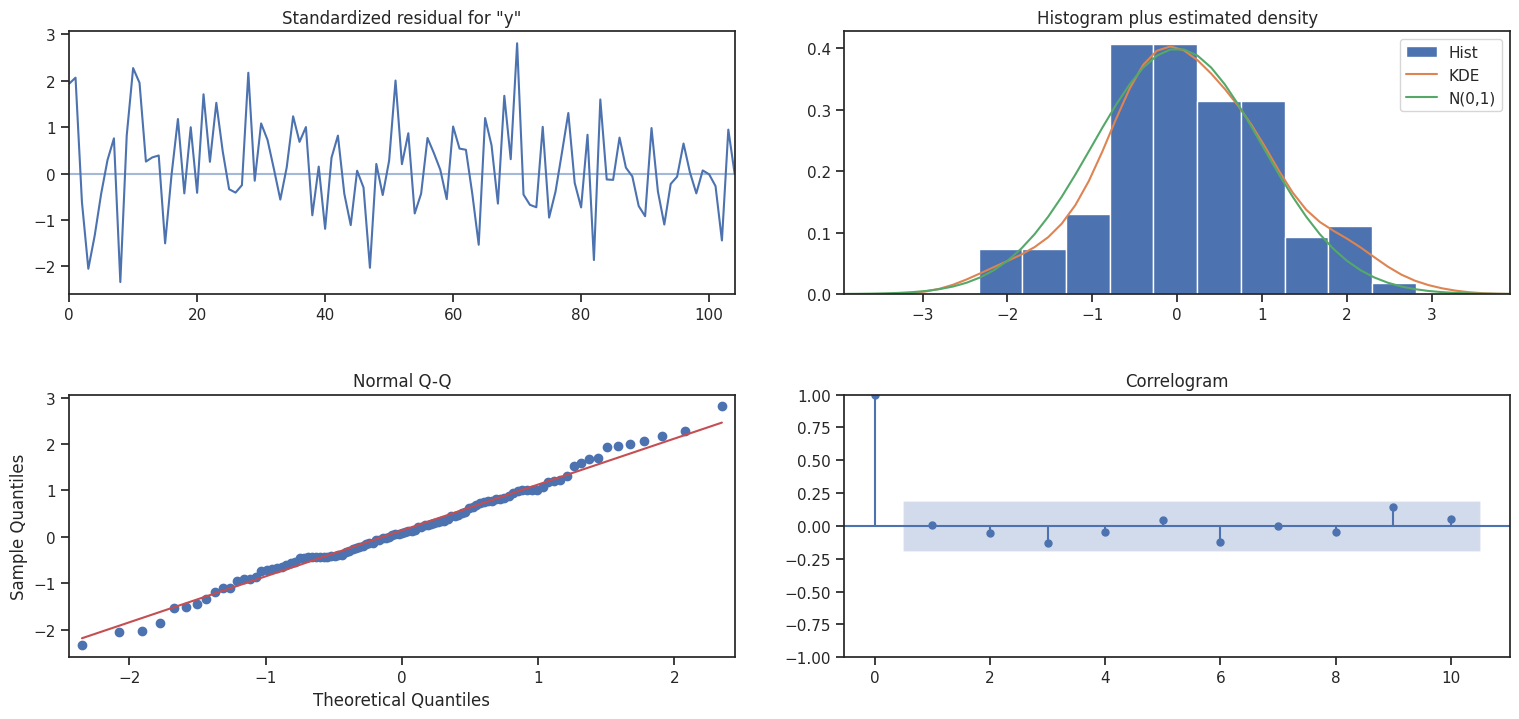

In [158]:
fig = results_manual_SARIMA.plot_diagnostics(figsize=(16, 8))
fig.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()

Forecasting

In [159]:
predicted_manual_SARIMA = pd.DataFrame(results_manual_SARIMA.forecast(steps=len(test)))
predicted_manual_SARIMA

0
0    48.573382
1    59.070598
2    73.308522
3    69.566998
4    64.394885
5    75.855499
6    75.016889
7    65.371162
8    78.341435
9    67.599627
10  103.375051
11  127.789133
12   40.003562
13   56.874872
14   66.901495
15   66.343944
16   60.008706
17   69.634674
18   69.963577
19   60.994734
20   73.977234
21   60.250146
22   99.819619
23  123.240794
24   37.248052
25   51.497710
26   63.256433
27   61.389321
28   55.532473
29   65.913027
30   65.761735
31   56.514491
32   69.491961
33   56.992713
34   95.001702
35  118.831257
36   32.101129
37   47.429066
38   58.475380
39   57.146888
40   51.093279
41   61.163473
42   61.209685
43   52.076947
44   65.056486
45   52.052229
46   90.703042
47  114.364632
48   27.937788
49   42.822232
50   54.161558
51   52.611532
52   46.638852
53   56.836696
54   56.801674

In [160]:
# Calculate the RMSE
rmse_manual_SARIMA = np.sqrt(mean_squared_error(test['Rose'].values, forecast_manual_SARIMA))

print(f'RMSE for manual SARIMA model: {rmse_manual_SARIMA}')


RMSE for manual SARIMA model: 18.232985917164594


In [161]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse_manual_SARIMA}
                           ,index=['order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),Manual SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       61.531528
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TripleEx...  36.711757
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610
Auto_ARIMA                                          35.961984
order=(0,1,2),seasonal_order=(2, 2, 2, 12),Auto...  34.267517
Manual_ARIMA                                        35.845123
order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),Ma...  18.232986

### Based on RMSE as evaluation metrics, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [162]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [163]:
future_predictions=pd.DataFrame(columns=['Future_Rose'],index=date)

### Model 1: Triple Exponential Smoothing

In [164]:
TES_train = df.copy()

In [165]:
#Approach 1: sets the smoothing parameters (alpha, beta, gamma) and doesn't rely on optimization, making it more rigid.
model_TES_tm_sm = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [166]:
future_predictions['Future_Rose']=prediction
future_predictions

Future_Rose
1995-08-01          NaN
1995-09-01          NaN
1995-10-01          NaN
1995-11-01          NaN
1995-12-01          NaN
1996-01-01          NaN
1996-02-01          NaN
1996-03-01          NaN
1996-04-01          NaN
1996-05-01          NaN
1996-06-01          NaN
1996-07-01          NaN

             Forecast  Lower Bound  Upper Bound
1995-08-31  58.607416    23.995426    93.219406
1995-09-30  52.609129    17.997138    87.221119
1995-10-31  52.404658    17.792667    87.016648
1995-11-30  60.737040    26.125050    95.349031
1995-12-31  83.883256    49.271266   118.495247
1996-01-31  34.281140    -0.330850    68.893131
1996-02-29  40.862360     6.250370    75.474351
1996-03-31  45.851970    11.239980    80.463961
1996-04-30  44.043241     9.431250    78.655231
1996-05-31  42.522405     7.910414    77.134395
1996-06-30  46.305973    11.693983    80.917964
1996-07-31  58.274895    23.662905    92.886885


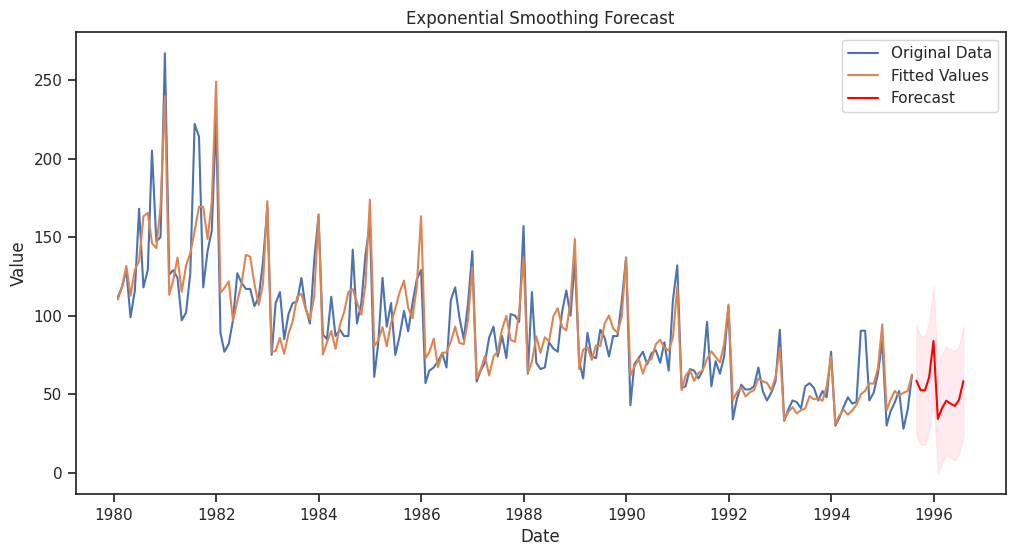

In [167]:
#Approach 2 : more flexible in terms of the seasonal period (seasonal_periods=12), which helps when there’s clear seasonality. Allows you to calculate confidence intervals.
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Fit the Exponential Smoothing model
model_TES_ta_sm = ExponentialSmoothing(TES_train['Rose'],
                                       trend='additive',
                                       seasonal='multiplicative',
                                       seasonal_periods=12)
fit_TES_ta_sm = model_TES_ta_sm.fit(smoothing_level=0.1,
                                    smoothing_slope=0.2,
                                    smoothing_seasonal=0.1,
                                    optimized=False)

# Make predictions for the next 12 months
predictions_TES_ta_sm = fit_TES_ta_sm.forecast(steps=12)

# Calculate standard error of the residuals
residuals = fit_TES_ta_sm.resid
se = np.sqrt(np.sum(residuals**2) / len(TES_train))

# Calculate the confidence intervals
confidence_interval = 1.96 * se
lower_bounds = predictions_TES_ta_sm - confidence_interval
upper_bounds = predictions_TES_ta_sm + confidence_interval

# Combine forecasts and confidence intervals into a DataFrame
forecast_df = pd.DataFrame({'Forecast': predictions_TES_ta_sm,
                            'Lower Bound': lower_bounds,
                            'Upper Bound': upper_bounds})

# Print the forecasted values and confidence intervals
print(forecast_df)

# Plot the original data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(TES_train['Rose'], label='Original Data')
plt.plot(fit_TES_ta_sm.fittedvalues, label='Fitted Values')
plt.plot(predictions_TES_ta_sm, label='Forecast', color='red')
plt.fill_between(forecast_df.index,
                 forecast_df['Lower Bound'],
                 forecast_df['Upper Bound'],
                 color='pink', alpha=0.3)
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [168]:
forecast_df.head()

Forecast  Lower Bound  Upper Bound
1995-08-31  58.607416    23.995426    93.219406
1995-09-30  52.609129    17.997138    87.221119
1995-10-31  52.404658    17.792667    87.016648
1995-11-30  60.737040    26.125050    95.349031
1995-12-31  83.883256    49.271266   118.495247

### Model 2: Manual ARIMA

In [169]:
TES_train = df.copy()